## 1. The tweets

When Trump wished the Olympic team good luck, he was tweeting from an iPhone. When he insulted a rival, he was usually tweeting from an Android. Is this an artifact showing which tweets are Trump’s own and which are by some handler in the 2016 campaign?

Others have explored Trump’s timeline and noticed this tends to hold up. And Trump himself did indeed tweet from a Samsung Galaxy until March 2017. But how could we examine it quantitatively? 

Let's load the content of Donald Trump’s timeline. Our dataset is from The Trump Twitter Archive by Brendan Brown, which contains all 35,000+ tweets from the @realDonaldTrump Twitter account from 2009 (the year Trump sent his first tweet) through 2018.

<p><a href="https://twitter.com/tvaziri/status/762005541388378112"><img src="https://assets.datacamp.com/production/project_511/img/tweet.png" alt="@tvaziri's hypothesis about Donald Trump’s Twitter account" style="width:500px; height:500px;"></a></p>

In [58]:
library(tidyverse)
library(paletteer)
library(showtext)
library(patchwork)
library(tidytext)
library(reshape2)
library(ggrepel)
library(ggtext)
library(lubridate)
library(janitor)
library(ggthemes)
library(scales)
library(tidyr)
library(lattice)
library(maps)
library(MetBrewer)
library(wordcloud)
library(wordcloud2)
library(tm)

In [59]:
library(repr)
options(repr.plot.width = 15, repr.plot.height =12)

annotate <- ggplot2::annotate

font_add(family = "Roboto",regular = "../input/roboto/RobotoCondensed-Regular.ttf")
showtext_auto()

my_theme <- function() {
  
  # Colors
  color.background = "#FFFFFF"
  color.text = "#363636"
  
  # Begin construction of chart
  theme_bw(base_size=15) +
    
    # Format background colors
    theme(panel.background = element_rect(fill=color.background, color=color.background)) +
    theme(plot.background  = element_rect(fill=color.background, color=color.background)) +
    theme(panel.border     = element_rect(color=color.background)) +
    theme(strip.background = element_rect(fill=color.background, color=color.background)) +
    
    # Format the grid
    theme(panel.grid.major.y = element_blank()) +
    theme(panel.grid.minor.y = element_blank()) +
    theme(panel.grid.major.x = element_blank())+
    theme(panel.grid.minor.x = element_blank()) +
    theme(axis.ticks       = element_blank()) +
    
    # Format the legend
    theme(legend.position = "right") +
    theme(legend.background = element_rect(fill=color.background, color=color.background))+
    theme(legend.text = element_text(size = 15, face = "bold", color=color.text))+
    theme(legend.justification = "center")+
    theme(legend.title = element_text(family = "Roboto",color = "white",size = 10, face = "bold"))+

# Format title and axis labels
    theme(plot.title       = element_text(color=color.text, size=40, hjust = 0.5,face = "bold", family = 'Roboto'))+
    theme(plot.subtitle    = element_text(color=color.text, size=30, face = "bold", family = 'Roboto'))+
    theme(plot.caption     = element_text(color=color.text, size=20, face = "bold", hjust = 0.5, family = 'Roboto'))+
    theme(axis.title.x     = element_text(size=20, color = color.text, hjust = 0.5, vjust = 0.5,face = "bold", family = 'Roboto')) +
    theme(axis.title.y     = element_text(size=20, color = color.text, hjust = 0.5, vjust = 0.5,face = "bold", family = 'Roboto')) +
    theme(axis.text.x      = element_text(size=25, color = color.text, hjust = 0.5, vjust = 0.5,face = "bold", family = 'Roboto')) +
    theme(axis.text.y      = element_text(size=25, color = color.text, face = "bold", family = 'Roboto')) +
    theme(strip.text       = element_text(size=25, color = color.text, hjust = 0.5, vjust = 0.5,face = "bold", family = 'Roboto')) +

# Plot margins
    theme(plot.margin = unit(c(0.35, 0.2, 0.3, 0.35), "cm"))
}   

In [60]:
df <- read_csv("../input/trumptweets/trump_tweets.csv")
head(df)

Rows: 35219 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): source, text
dbl  (4): id_str, retweet_count, in_reply_to_user_id_str, favorite_count
lgl  (1): is_retweet
dttm (1): created_at

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


source,id_str,text,created_at,retweet_count,in_reply_to_user_id_str,favorite_count,is_retweet
<chr>,<dbl>,<chr>,<dttm>,<dbl>,<dbl>,<dbl>,<lgl>
Twitter Web Client,6971079756,"From Donald Trump: Wishing everyone a wonderful holiday & a happy, healthy, prosperous New Year. Let’s think like champions in 2010!",2009-12-23 17:38:18,28,NA,12,FALSE
Twitter Web Client,6312794445,Trump International Tower in Chicago ranked 6th tallest building in world by Council on Tall Buildings & Urban Habitat http://bit.ly/sqvQq,2009-12-03 19:39:09,33,NA,6,FALSE
Twitter Web Client,6090839867,Wishing you and yours a very Happy and Bountiful Thanksgiving!,2009-11-26 19:55:38,13,NA,11,FALSE
Twitter Web Client,5775731054,"Donald Trump Partners with TV1 on New Reality Series Entitled, Omarosa's Ultimate Merger: http://tinyurl.com/yk5m3lc",2009-11-16 21:06:10,5,NA,3,FALSE
Twitter Web Client,5364614040,"--Work has begun, ahead of schedule, to build the greatest golf course in history: Trump International – Scotland.",2009-11-02 14:57:56,7,NA,6,FALSE
Twitter Web Client,5203117820,"--From Donald Trump: ""Ivanka and Jared’s wedding was spectacular, and they make a beautiful couple. I’m a very proud father.""",2009-10-27 15:31:48,4,NA,5,FALSE


In [62]:
dim(df)

[1] 35219     8

In [65]:
df <- df %>%
mutate(year = year(created_at))
head(df)

source,id_str,text,created_at,retweet_count,in_reply_to_user_id_str,favorite_count,is_retweet,year
<chr>,<dbl>,<chr>,<dttm>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>
Twitter Web Client,6971079756,"From Donald Trump: Wishing everyone a wonderful holiday & a happy, healthy, prosperous New Year. Let’s think like champions in 2010!",2009-12-23 17:38:18,28,NA,12,FALSE,2009
Twitter Web Client,6312794445,Trump International Tower in Chicago ranked 6th tallest building in world by Council on Tall Buildings & Urban Habitat http://bit.ly/sqvQq,2009-12-03 19:39:09,33,NA,6,FALSE,2009
Twitter Web Client,6090839867,Wishing you and yours a very Happy and Bountiful Thanksgiving!,2009-11-26 19:55:38,13,NA,11,FALSE,2009
Twitter Web Client,5775731054,"Donald Trump Partners with TV1 on New Reality Series Entitled, Omarosa's Ultimate Merger: http://tinyurl.com/yk5m3lc",2009-11-16 21:06:10,5,NA,3,FALSE,2009
Twitter Web Client,5364614040,"--Work has begun, ahead of schedule, to build the greatest golf course in history: Trump International – Scotland.",2009-11-02 14:57:56,7,NA,6,FALSE,2009
Twitter Web Client,5203117820,"--From Donald Trump: ""Ivanka and Jared’s wedding was spectacular, and they make a beautiful couple. I’m a very proud father.""",2009-10-27 15:31:48,4,NA,5,FALSE,2009


# Number of Tweets per Year

Warning message:
“Continuous limits supplied to discrete scale.
Did you mean `limits = factor(...)` or `scale_*_continuous()`?”


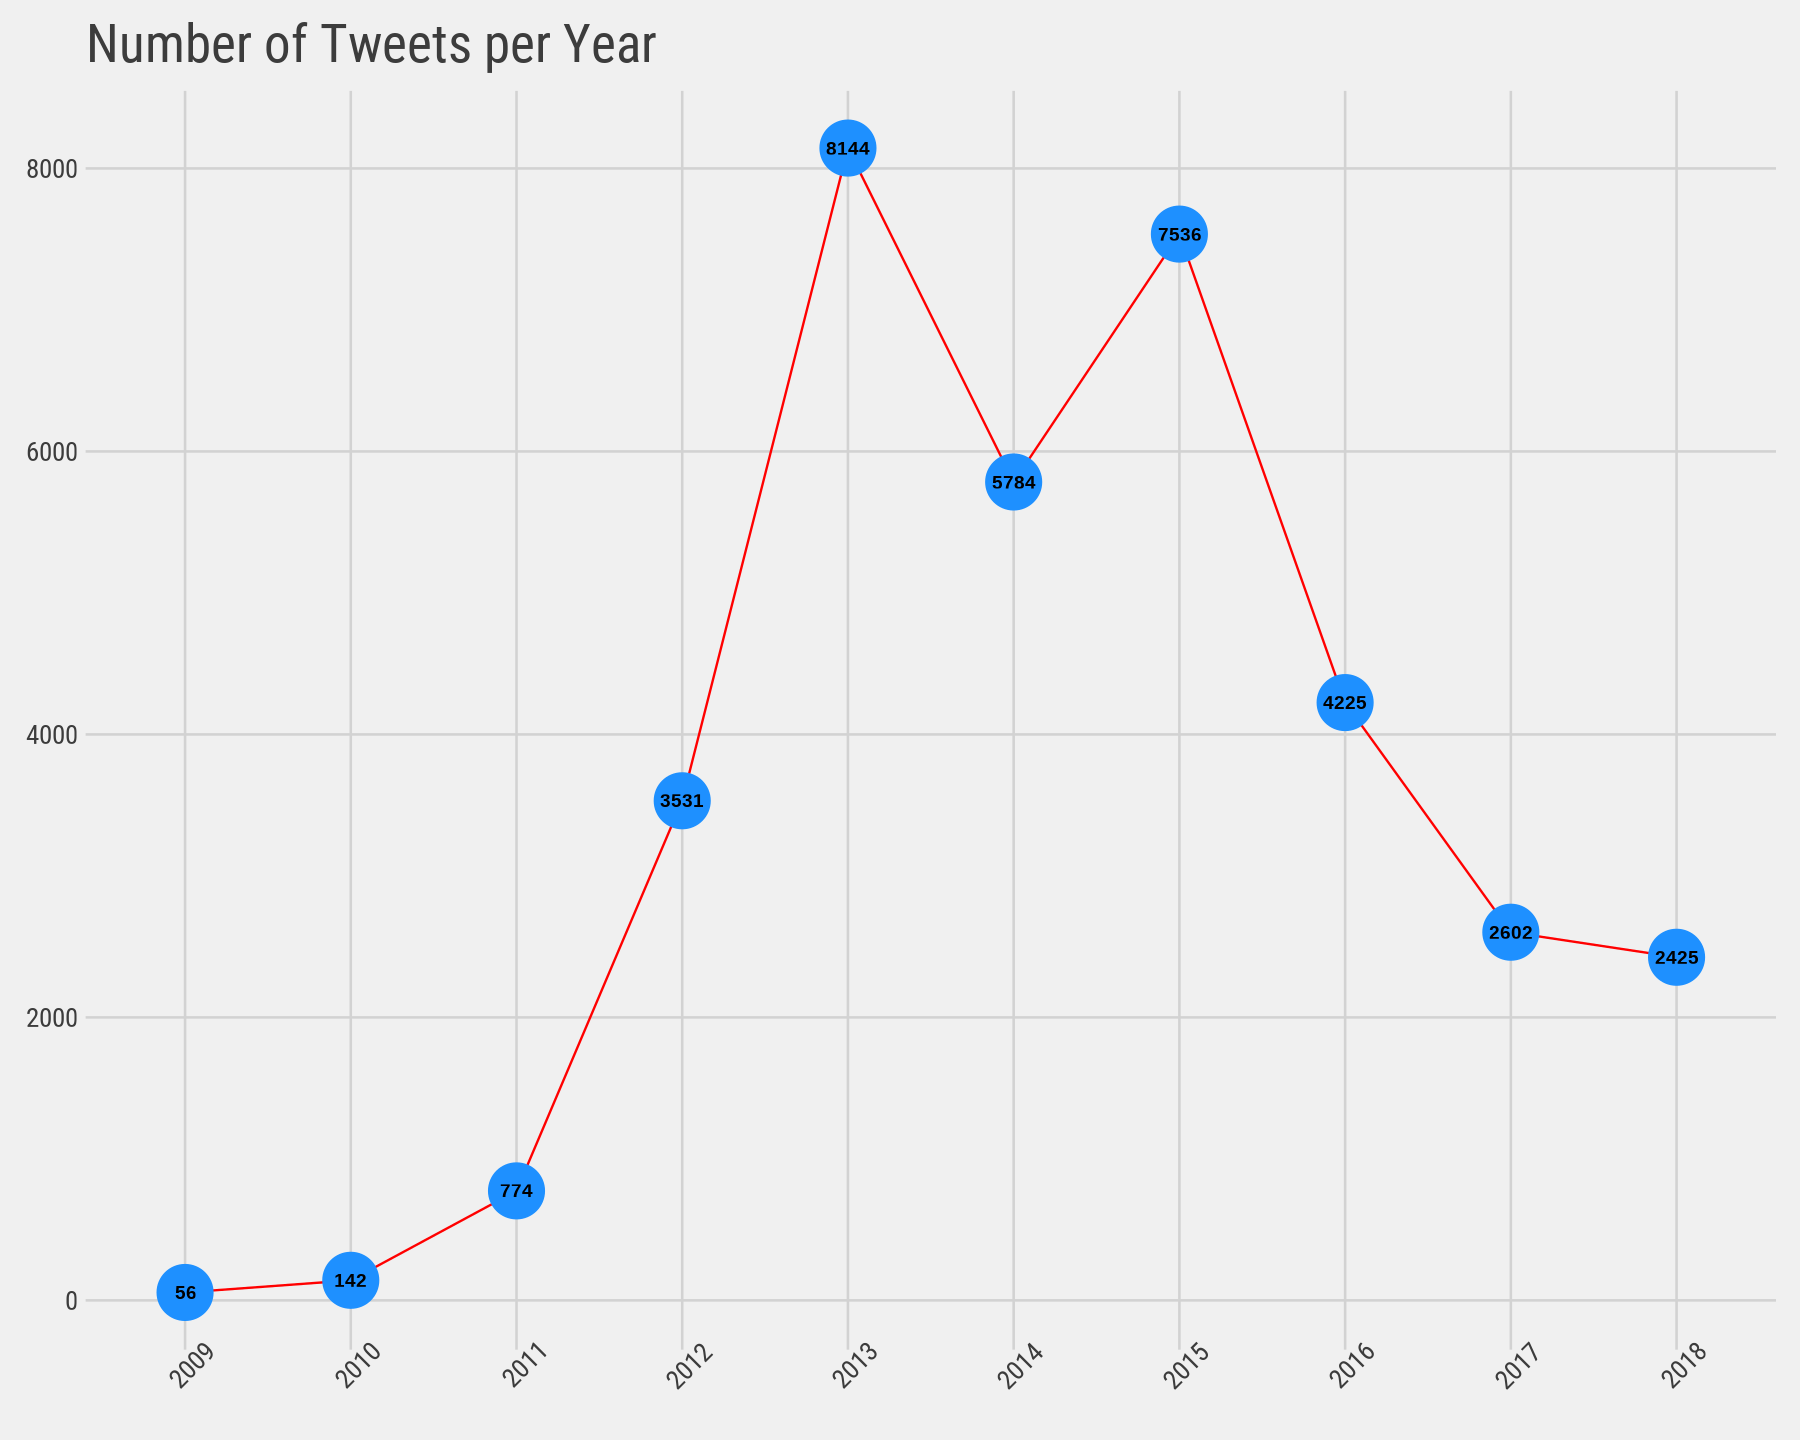

In [66]:
df %>%
count(year)%>%
ggplot(aes(year, n))+
geom_line(color = "red")+
geom_point(size = 15, color = "#1E90FF")+
geom_text(aes(label = n), size = 5, vjust = 0.5,hjust = 0.5, color = "black", fontface = "bold")+
scale_x_discrete(limits = c(2009:2018))+
theme_fivethirtyeight()+
theme(axis.text.x = element_text(size = 20, face = 'bold', angle = 45,family = 'Roboto'))+
theme(axis.text.y = element_text(size = 20, face = 'bold',family = 'Roboto'))+
theme(plot.title =  element_text(size = 40, face = 'bold',family = 'Roboto'))+
theme(plot.subtitle = element_text(size = 30, face = 'bold',family = 'Roboto'))+
theme(legend.position = "none")+
labs(title = "Number of Tweets per Year")

## 2. Clean those tweets
<p>We'll clean the data by extracting the source application. We’re only looking at the iPhone and Android tweets. A much smaller number of tweets are from the web client or iPad.</p>
<p>Overall, the cleaned data should include 2275 tweets from an iPhone device and 4240 tweets from an Android device.</p>

In [69]:
# Count the nubmer of tweets by source
# Count the nubmer of tweets by source
df %>% count(source, sort = TRUE)

# Clean the tweets
cleaned_tweets <- df %>%
  select(id_str, source, text, created_at) %>%
  filter(source %in% c("Twitter for Android", "Twitter for iPhone")) %>%
  extract(source, "source", "(\\w+)$")

# Inspect the first six rows
head(cleaned_tweets)

source,n
<chr>,<int>
Twitter for Android,14545
Twitter Web Client,12179
Twitter for iPhone,6850
TweetDeck,483
TwitLonger Beta,405
Media Studio,154
Instagram,133
Facebook,105
Twitter Ads,97


id_str,source,text,created_at
<dbl>,<chr>,<chr>,<dttm>
2.783081e+17,iPhone,"Good luck to Bob Kraft, Tom Brady, and Coach Bill Belichick tonight.",2012-12-11 01:20:01
4.181450e+17,Android,"Have a happy, successful and healthy New Year!",2013-12-31 22:21:51
4.181444e+17,Android,"When it comes to money, finance and even life, PROTECT THE DOWNSIDE AND THE UPSIDE WILL TAKE CARE OF ITSELF!",2013-12-31 22:19:28
4.179857e+17,Android,Spend your last day of 2013 contemplating the moves you will make in 2014 to make it your best year ever!,2013-12-31 11:48:59
4.178184e+17,Android,The con artists changed the name from GLOBAL WARMING to CLIMATE CHANGE when GLOBAL WARMING was no longer working and credibility was lost!,2013-12-31 00:44:02
4.178160e+17,Android,"What the hell is going on with GLOBAL WARMING. The planet is freezing, the ice is building and the G.W. scientists are stuck-a total con job",2013-12-31 00:34:40


In [70]:
cleaned_tweets <- cleaned_tweets %>%
mutate(year = year(created_at))
head(cleaned_tweets)

id_str,source,text,created_at,year
<dbl>,<chr>,<chr>,<dttm>,<dbl>
2.783081e+17,iPhone,"Good luck to Bob Kraft, Tom Brady, and Coach Bill Belichick tonight.",2012-12-11 01:20:01,2012
4.181450e+17,Android,"Have a happy, successful and healthy New Year!",2013-12-31 22:21:51,2013
4.181444e+17,Android,"When it comes to money, finance and even life, PROTECT THE DOWNSIDE AND THE UPSIDE WILL TAKE CARE OF ITSELF!",2013-12-31 22:19:28,2013
4.179857e+17,Android,Spend your last day of 2013 contemplating the moves you will make in 2014 to make it your best year ever!,2013-12-31 11:48:59,2013
4.178184e+17,Android,The con artists changed the name from GLOBAL WARMING to CLIMATE CHANGE when GLOBAL WARMING was no longer working and credibility was lost!,2013-12-31 00:44:02,2013
4.178160e+17,Android,"What the hell is going on with GLOBAL WARMING. The planet is freezing, the ice is building and the G.W. scientists are stuck-a total con job",2013-12-31 00:34:40,2013


Warning message:
“Continuous limits supplied to discrete scale.
Did you mean `limits = factor(...)` or `scale_*_continuous()`?”


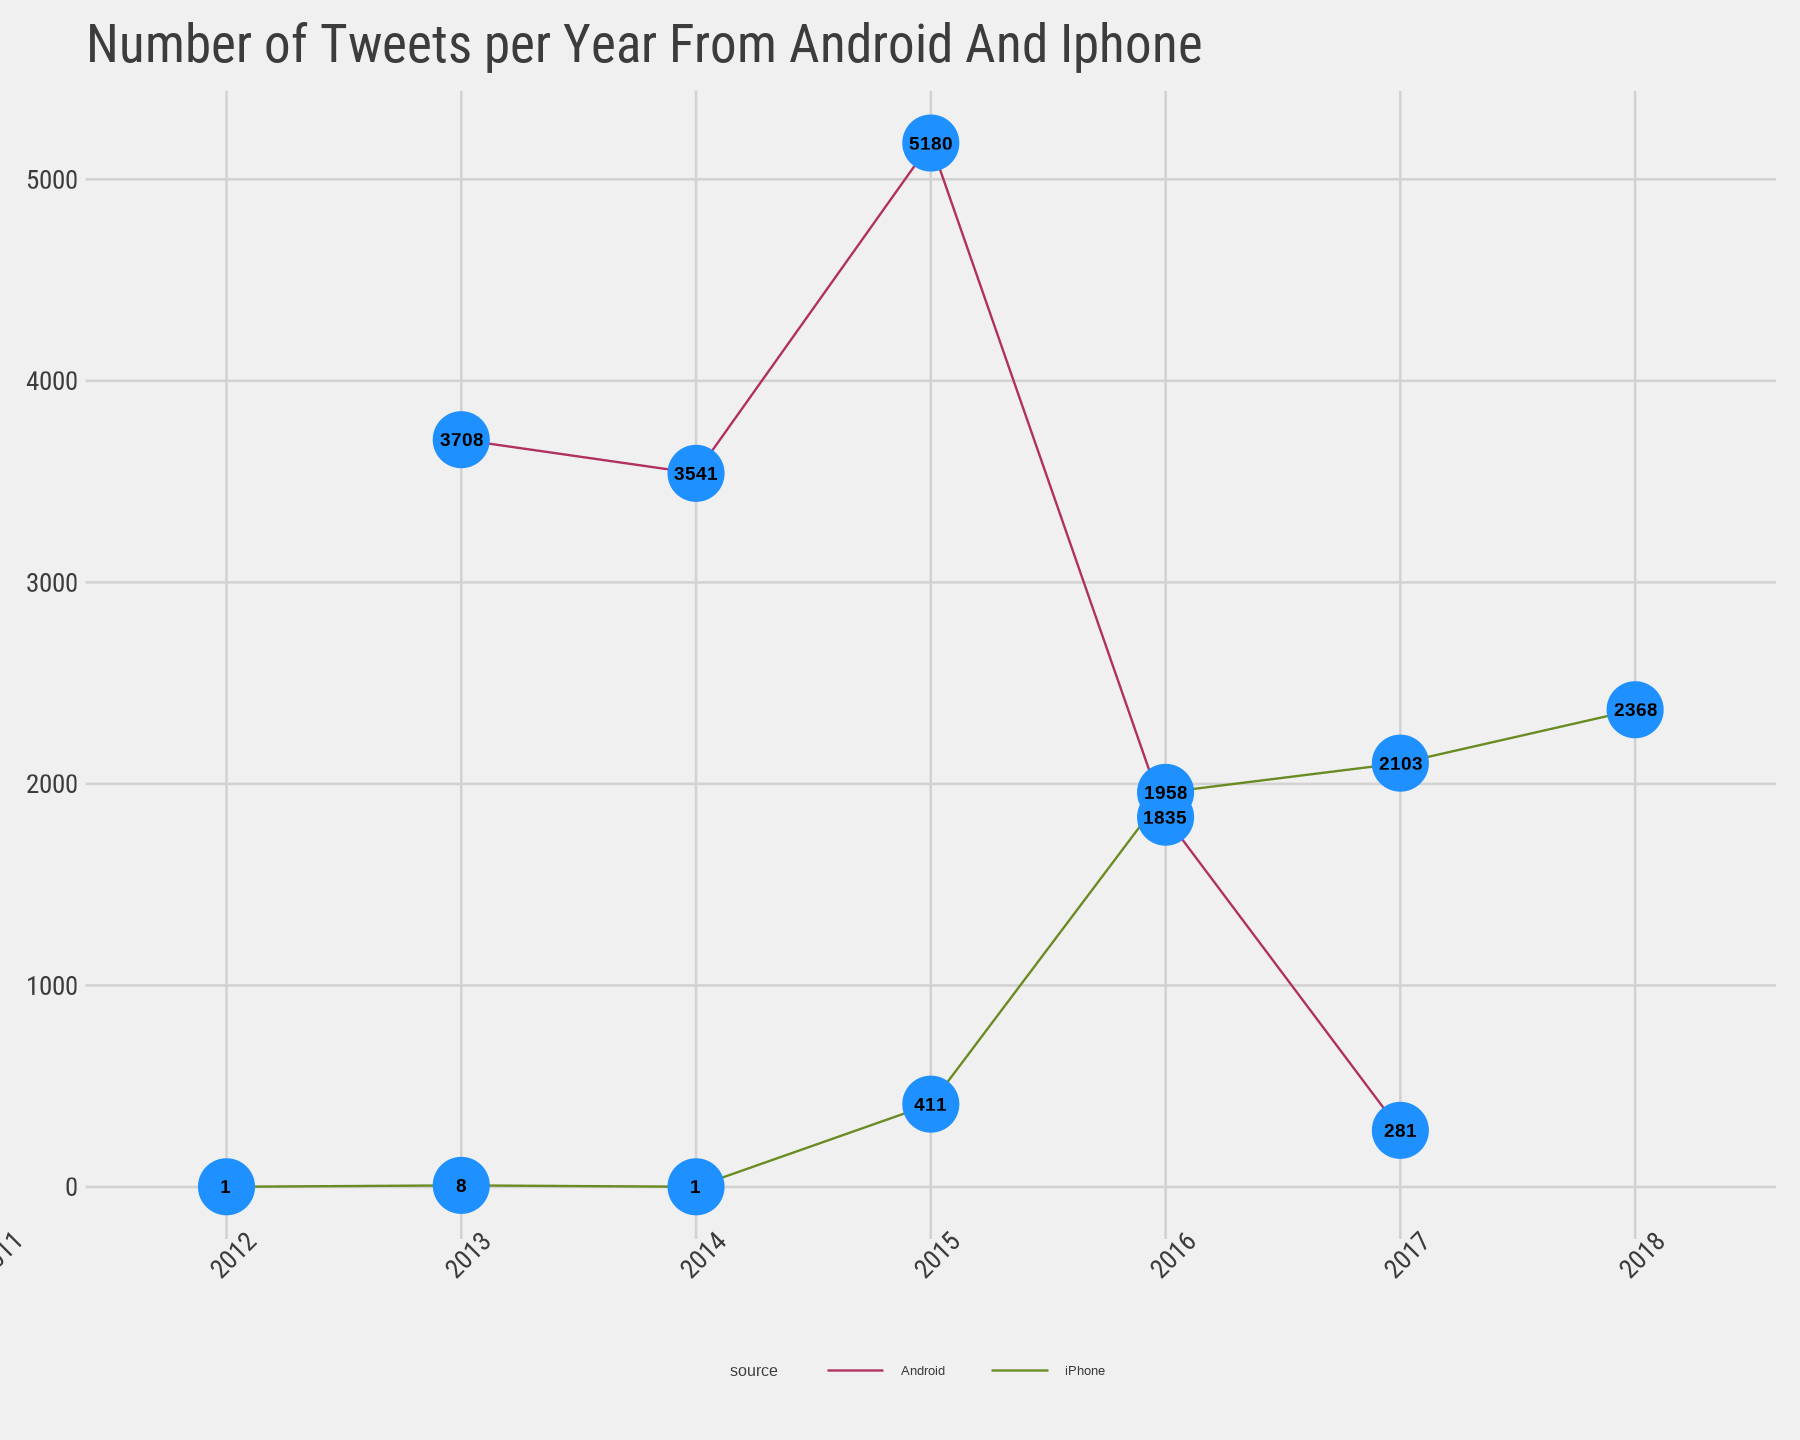

In [71]:
cleaned_tweets %>%
group_by(source)%>%
count(year)%>%
ggplot(aes(year, n, color = source))+
geom_line()+
geom_point(size = 15, color = "#1E90FF")+
geom_text(aes(label = n), size = 5, vjust = 0.5,hjust = 0.5, color = "black", fontface = "bold")+
scale_x_discrete(limits = c(2009:2018))+
scale_color_manual(values = c("#B03060","#698B22"))+
theme_fivethirtyeight()+
theme(axis.text.x = element_text(size = 20, face = 'bold', angle = 45,family = 'Roboto'))+
theme(axis.text.y = element_text(size = 20, face = 'bold',family = 'Roboto'))+
theme(plot.title =  element_text(size = 40, face = 'bold',family = 'Roboto'))+
theme(plot.subtitle = element_text(size = 30, face = 'bold',family = 'Roboto'))+
theme(legend.key.size = unit(1.5, 'cm'))+
labs(title = "Number of Tweets per Year From Android And Iphone")

## Countries Mentioned in Trump's Tweets

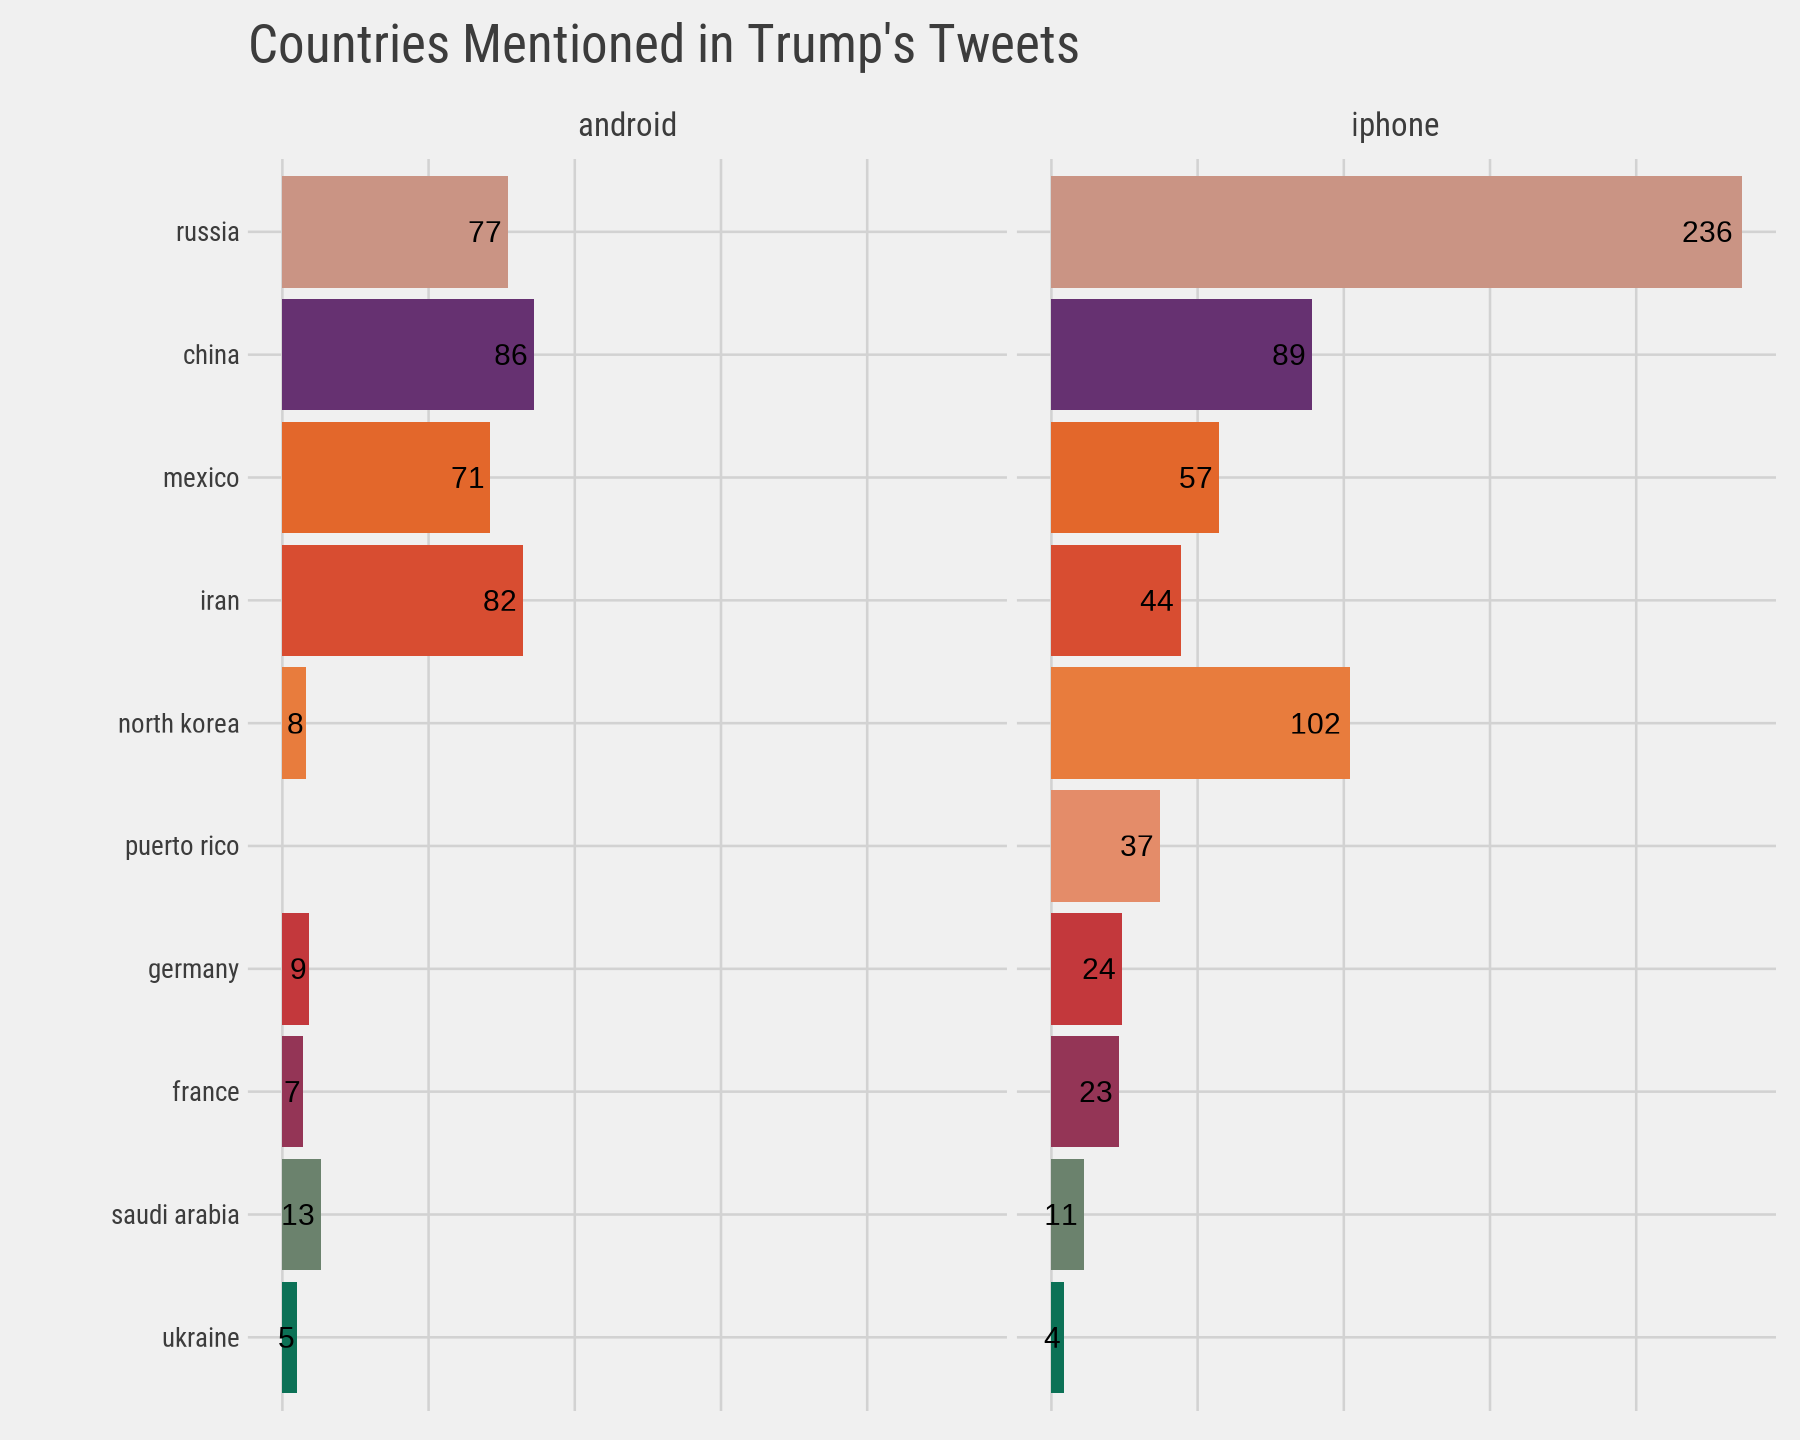

In [77]:
cleaned_tweets %>%
mutate_all(list(str_to_lower))%>%
mutate(country_mentioned = str_extract(text, pattern = "china|chinese|russia|iran|north korea|puerto rico|france|germany|ukraine|saudi arabia|mexico"))%>% 
mutate(country_mentioned = str_replace(country_mentioned, pattern = "chinese", replacement = "china"))%>%
group_by(country_mentioned, source)%>%
count(country_mentioned, sort = TRUE)%>%
filter(!is.na(country_mentioned))%>%
ggplot(aes(reorder(country_mentioned,n),n, fill = country_mentioned))+
geom_col()+
facet_wrap(~source)+
geom_text(aes(label = n), size = 8, hjust = 1.2)+
coord_flip()+
scale_fill_manual(values = met.brewer("Java",10))+
theme_fivethirtyeight()+
theme(axis.text.x = element_blank())+
theme(axis.text.y = element_text(size = 20, face = 'bold',family = 'Roboto'))+
theme(plot.title =  element_text(size = 40, face = 'bold',family = 'Roboto'))+
theme(strip.text       = element_text(size=25, hjust = 0.5, vjust = 0.5,face = "bold", family = 'Roboto'))+
theme(legend.position = "none")+
labs(title = "Countries Mentioned in Trump's Tweets")

## 3. Is "time" the giveaway?
Most people are creatures of habit, and we would expect their tweet times to be a type of ‘signature’.

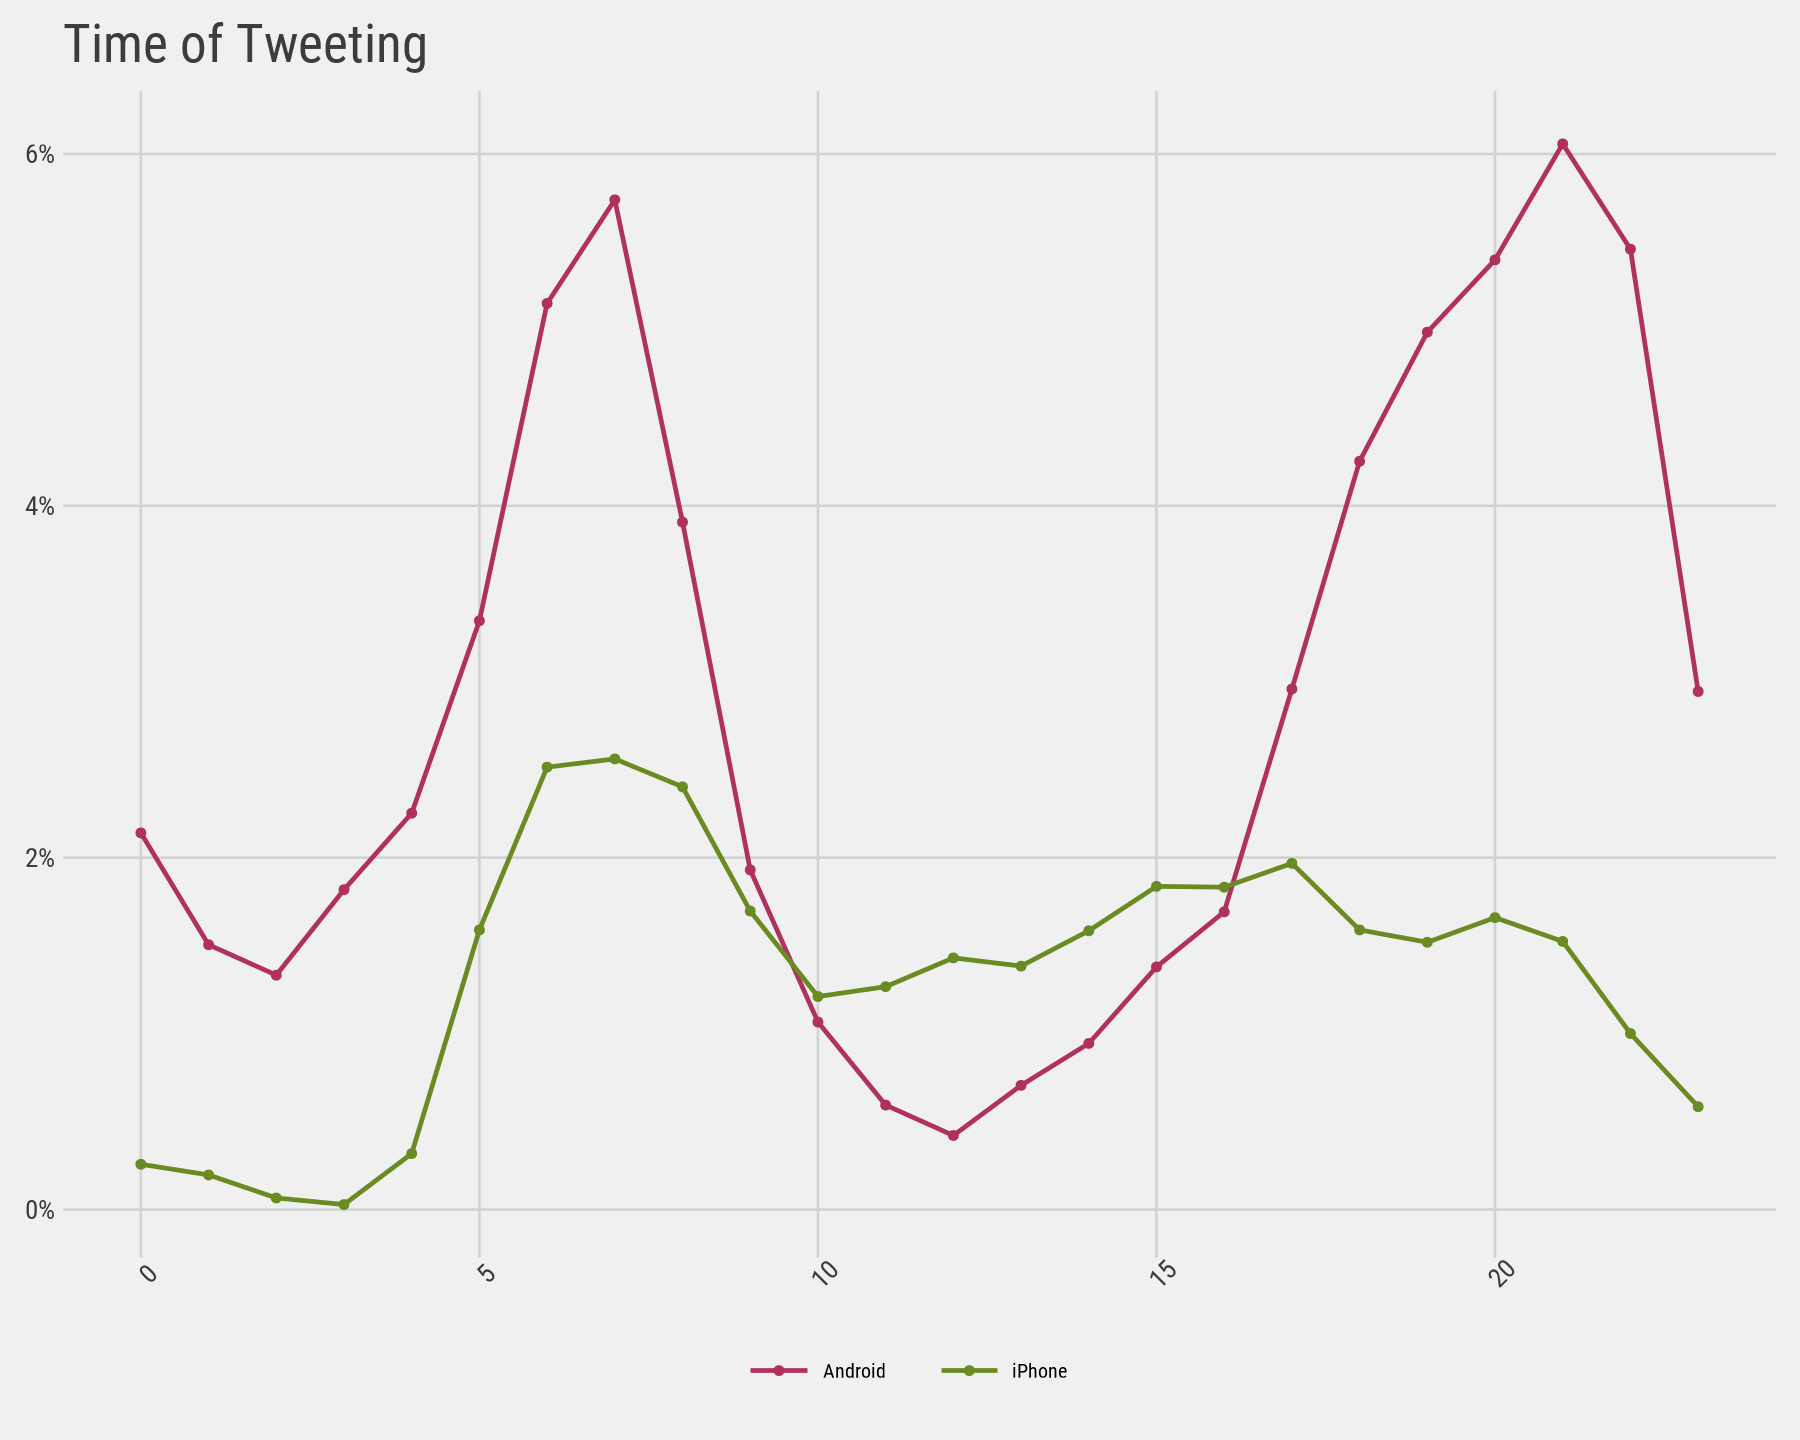

In [78]:
library(ggplot2)

# Plot the percentage of tweets by hour of the day for each device
cleaned_tweets %>%
  count(source, hour = hour(with_tz(created_at, "EST"))) %>%
  mutate(percent = n / sum(n)) %>%
  ggplot(aes(hour, percent, color = source)) +
  geom_line(size = 1) +
  geom_point(size = 2)+
  scale_color_manual(values = c("#B03060","#698B22"))+
  scale_y_continuous(labels = scales::label_percent()) +
  theme_fivethirtyeight()+
  theme(axis.text.x = element_text(size = 20, face = 'bold', angle = 45,family = 'Roboto'))+
  theme(axis.text.y = element_text(size = 20, face = 'bold',family = 'Roboto'))+
  theme(plot.title =  element_text(size = 40, face = 'bold',family = 'Roboto'))+
  theme(plot.subtitle = element_text(size = 30, face = 'bold',family = 'Roboto'))+
  theme(legend.text = element_text(size = 15, face = "bold", color="black",family = 'Roboto'))+
  theme(legend.title = element_text(family = "Roboto",color = "black",size = 10, face = "bold"))+
  theme(legend.key.size = unit(1.5, 'cm'))+
  labs(title = "Time of Tweeting",
       x = "Hour of day (EST)",
       y = "% of tweets",
       color = "")

🔎 **We can certainly spot the difference here. Most tweets from the Android are in the early morning or later in the evening, while tweets from the iPhone occur more often in the afternoon.**

## 4. The quote tweet is dead
Another place we can spot a difference is in Trump’s anachronistic behavior of “manually retweeting” people by copy-pasting their tweets, then surrounding them with quotation marks. These are known as quote tweets.

After this plot, we’ll filter out the quote tweets in the remainingby-word analyses because they contain text from followers that may not be representative of Trump’s tweets.

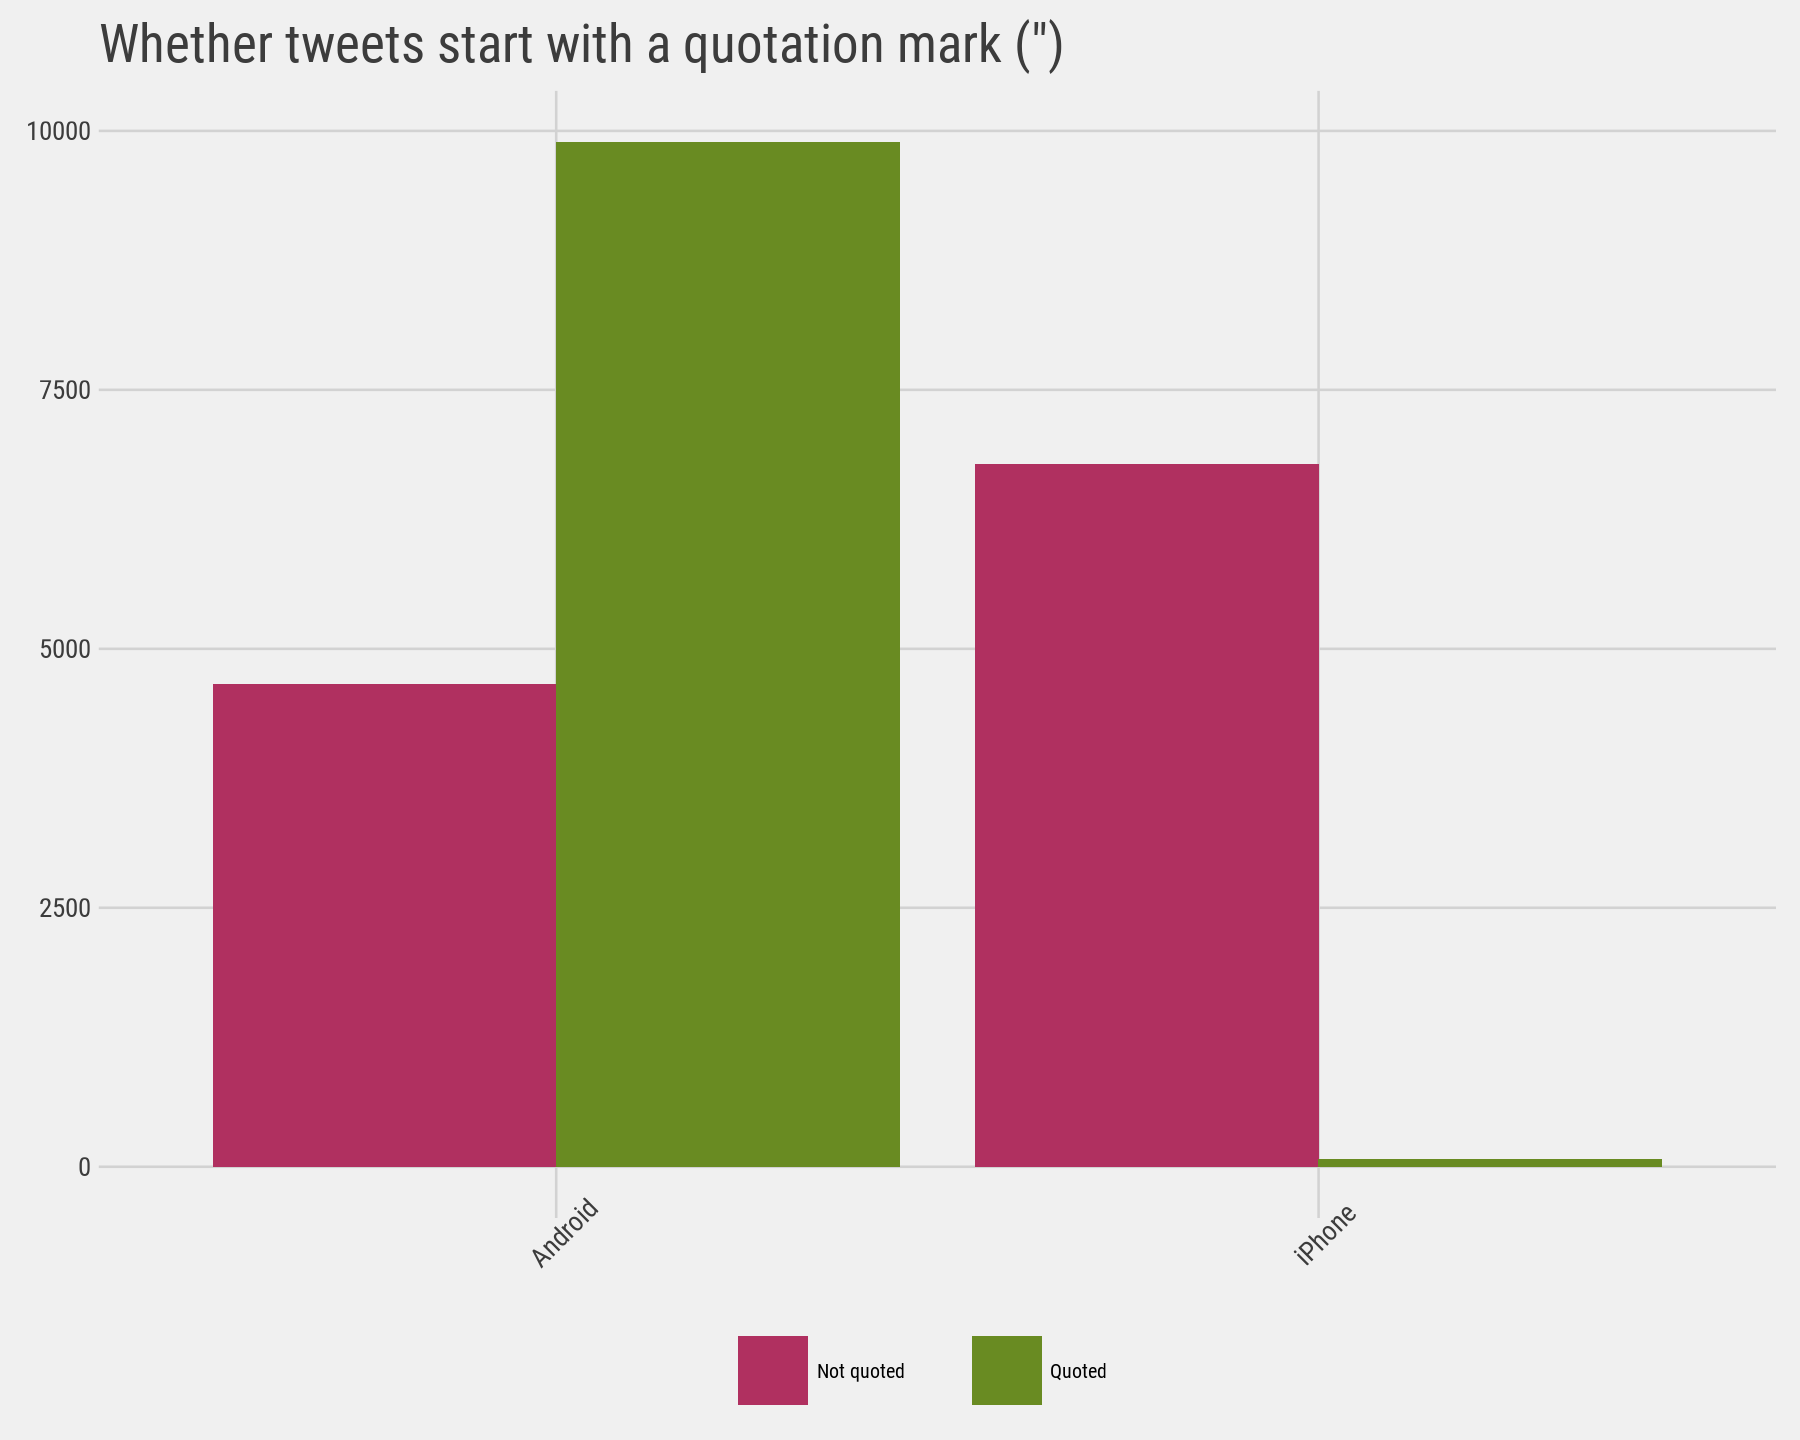

In [79]:
# Load stringr
library(stringr)

# Plot the number of tweets with and without quotes by device
cleaned_tweets %>%
  count(source,
        quoted = ifelse(str_detect(text, '^"'), "Quoted", "Not quoted")) %>%
  ggplot(aes(source, n, fill = quoted)) +
  geom_bar(stat = "identity", position = "dodge") +
  scale_fill_manual(values = c("#B03060","#698B22"))+
  theme_fivethirtyeight()+
  theme(axis.text.x = element_text(size = 20, face = 'bold', angle = 45,family = 'Roboto'))+
  theme(axis.text.y = element_text(size = 20, face = 'bold',family = 'Roboto'))+
  theme(plot.title =  element_text(size = 40, face = 'bold',family = 'Roboto'))+
  theme(plot.subtitle = element_text(size = 30, face = 'bold',family = 'Roboto'))+
  theme(legend.text = element_text(size = 15, face = "bold", color="black",family = 'Roboto'))+
  theme(legend.title = element_text(family = "Roboto",color = "black",size = 10, face = "bold"))+
  theme(legend.key.size = unit(1.5, 'cm'))+
  labs(x = "", y = "Number of tweets", fill = "") +
  ggtitle('Whether tweets start with a quotation mark (")')

🔎 **Almost all the quote tweets are posted from the Android.**

## 5. Links and pictures
Another place we see a difference between the iPhone and Android tweets is in the sharing of links or pictures.

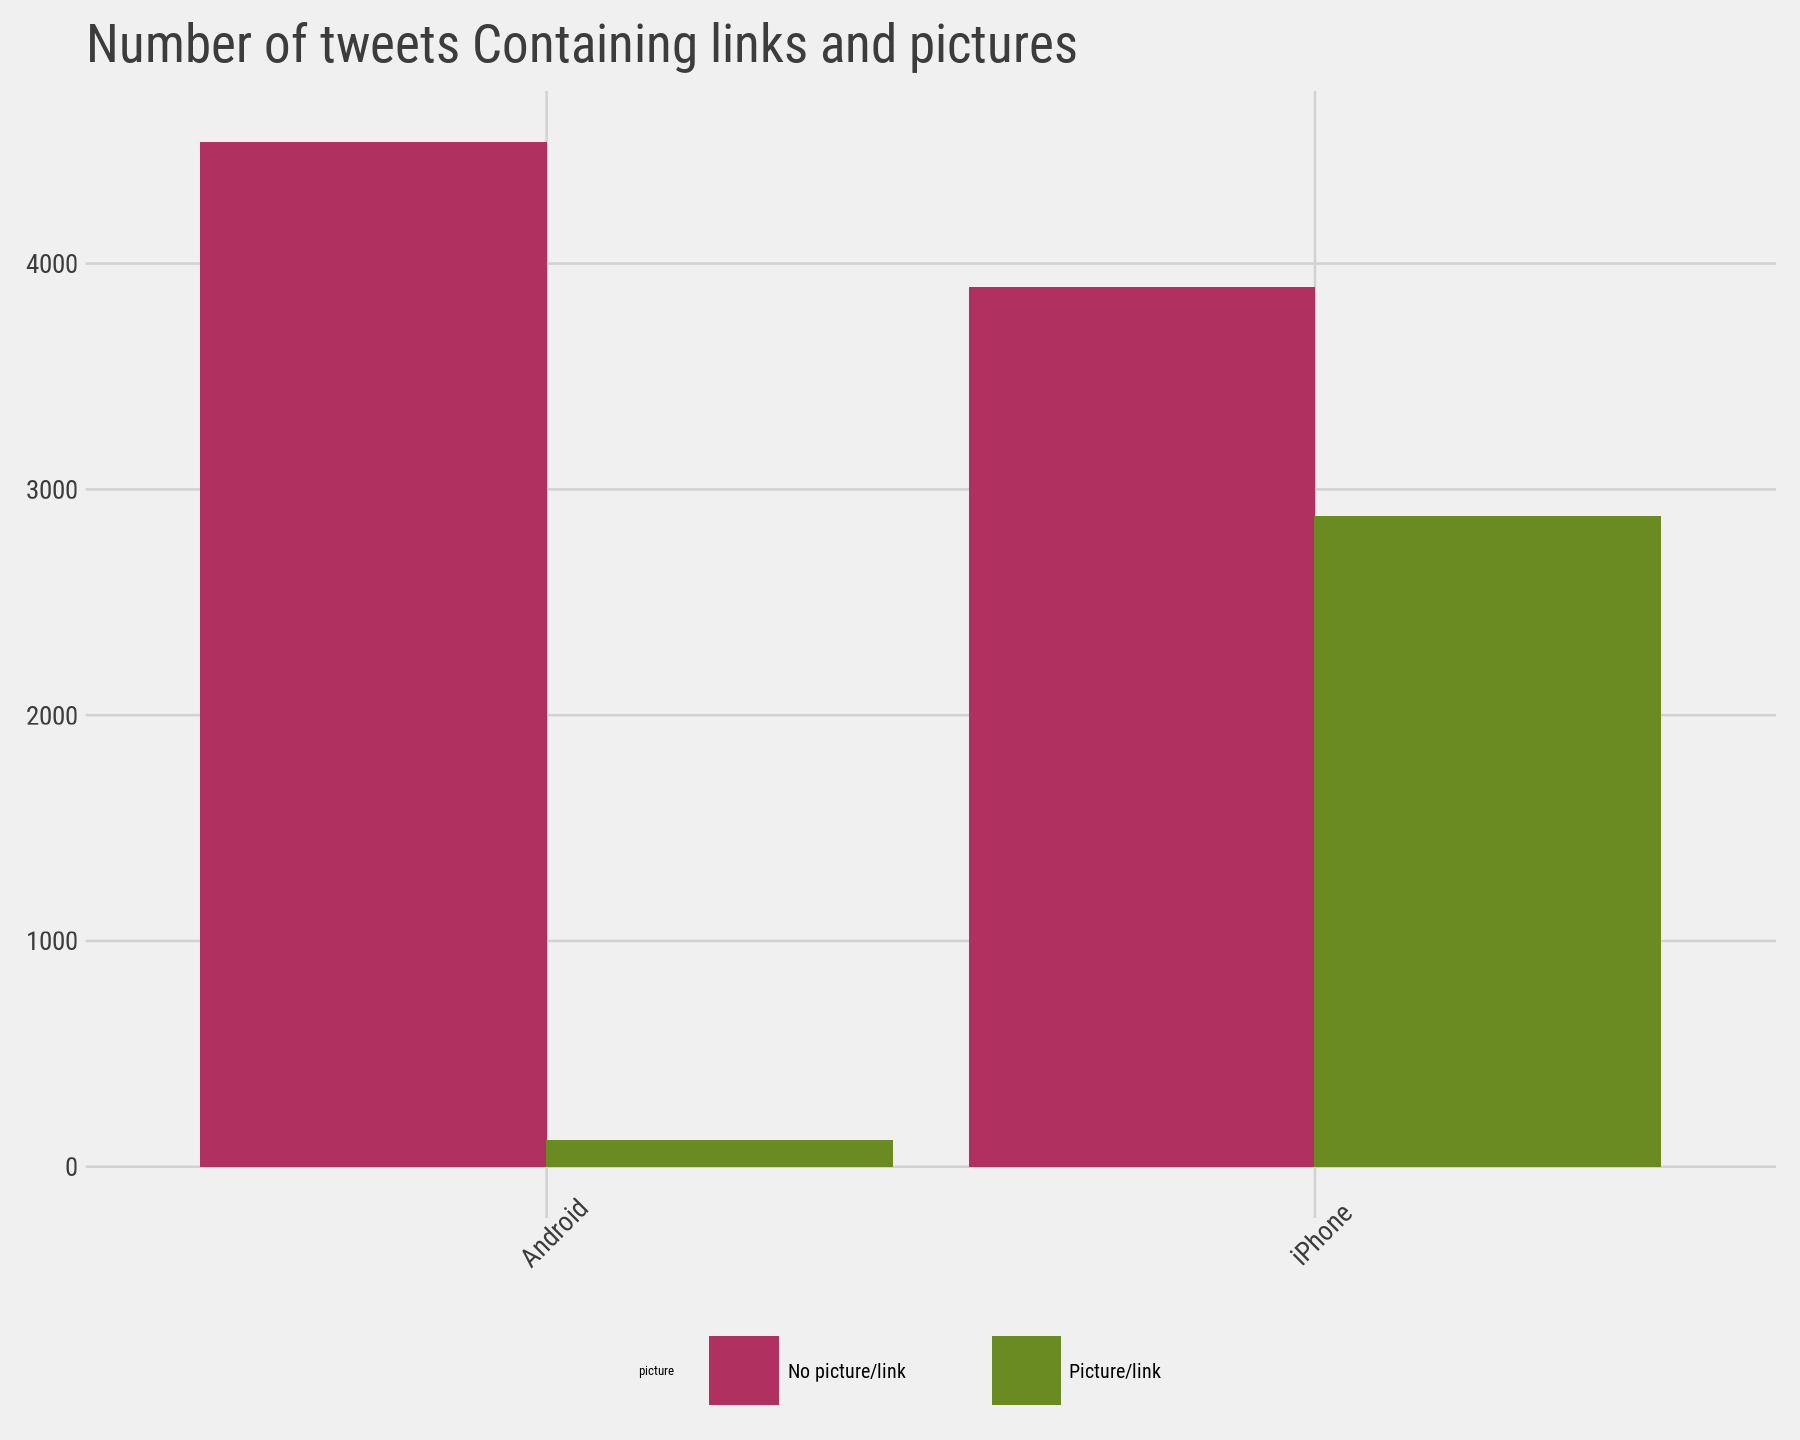

In [80]:
# Count the number of tweets with and without picture/links by device
tweet_picture_counts <- cleaned_tweets %>%
  filter(!str_detect(text, '^"')) %>%
  count(source,
        picture = ifelse(str_detect(text, "t.co"),
                         "Picture/link", "No picture/link"))

# Make a bar plot 
ggplot(tweet_picture_counts, aes(source, n, fill = picture)) +
geom_bar(stat = "identity", position = "dodge") +
scale_fill_manual(values = c("#B03060","#698B22"))+
theme_fivethirtyeight()+
theme(axis.text.x = element_text(size = 20, face = 'bold', angle = 45,family = 'Roboto'))+
theme(axis.text.y = element_text(size = 20, face = 'bold',family = 'Roboto'))+
theme(plot.title =  element_text(size = 40, face = 'bold',family = 'Roboto'))+
theme(plot.subtitle = element_text(size = 30, face = 'bold',family = 'Roboto'))+
theme(legend.text = element_text(size = 15, face = "bold", color="black",family = 'Roboto'))+
theme(legend.title = element_text(family = "Roboto",color = "black",size = 10, face = "bold"))+
theme(legend.key.size = unit(1.5, 'cm'))+
labs(title = "Number of tweets Containing links and pictures")

🔎 **It turns out that tweets from the iPhone were way more likely to contain either a picture or a link. This also makes sense with our narrative: iPhone (presumably run by the campaign) tends to write “announcement” tweets about events, like this:**

<p><a href="https://twitter.com/realDonaldTrump/status/762110918721310721"><img src="https://assets.datacamp.com/production/project_511/img/tweet_windham.png" alt="Thank you Windham, New Hampshire!" style="height:500px;"></a></p>
<p>While Android (Trump himself) tends to write picture-less tweets like:</p>
<p><a href="https://twitter.com/realDonaldTrump/status/762400869858115588"><img src="https://assets.datacamp.com/production/project_511/img/tweet_media.png" alt="The media is going crazy…very dishonest!" style="height:300px;"></a></p>

## 6. Comparison of words
Now that we’re sure there is a difference between these two platforms, what can we say about the difference in the content of the tweets? We’ll use the tidytext package
We start by dividing lines of text into individual words using unnest_tokens()

In [81]:
# Load the tidytext package
library(tidytext)

# Create a regex pattern
reg <- "([^A-Za-z\\d#@']|'(?![A-Za-z\\d#@]))"

# Unnest the text strings into a data frame of words
tweet_words <- cleaned_tweets %>%
  filter(!str_detect(text, '^"')) %>%
  mutate(text = str_replace_all(text, "https://t.co/[A-Za-z\\d]+|&amp;", "")) %>%
  unnest_tokens(word, text, token = "regex", pattern = reg) %>%
  filter(!word %in% stop_words$word,
         str_detect(word, "[a-z]"))

# Inspect the first six rows of tweet_words
head(tweet_words)

id_str,source,created_at,year,word
<dbl>,<chr>,<dttm>,<dbl>,<chr>
2.783081e+17,iPhone,2012-12-11 01:20:01,2012,luck
2.783081e+17,iPhone,2012-12-11 01:20:01,2012,bob
2.783081e+17,iPhone,2012-12-11 01:20:01,2012,kraft
2.783081e+17,iPhone,2012-12-11 01:20:01,2012,tom
2.783081e+17,iPhone,2012-12-11 01:20:01,2012,brady
2.783081e+17,iPhone,2012-12-11 01:20:01,2012,coach


## 7. Most common words
<p>What are the most common words @realDonaldTrump tweets? This plot should look familiar to anyone who has seen the feed.</p>

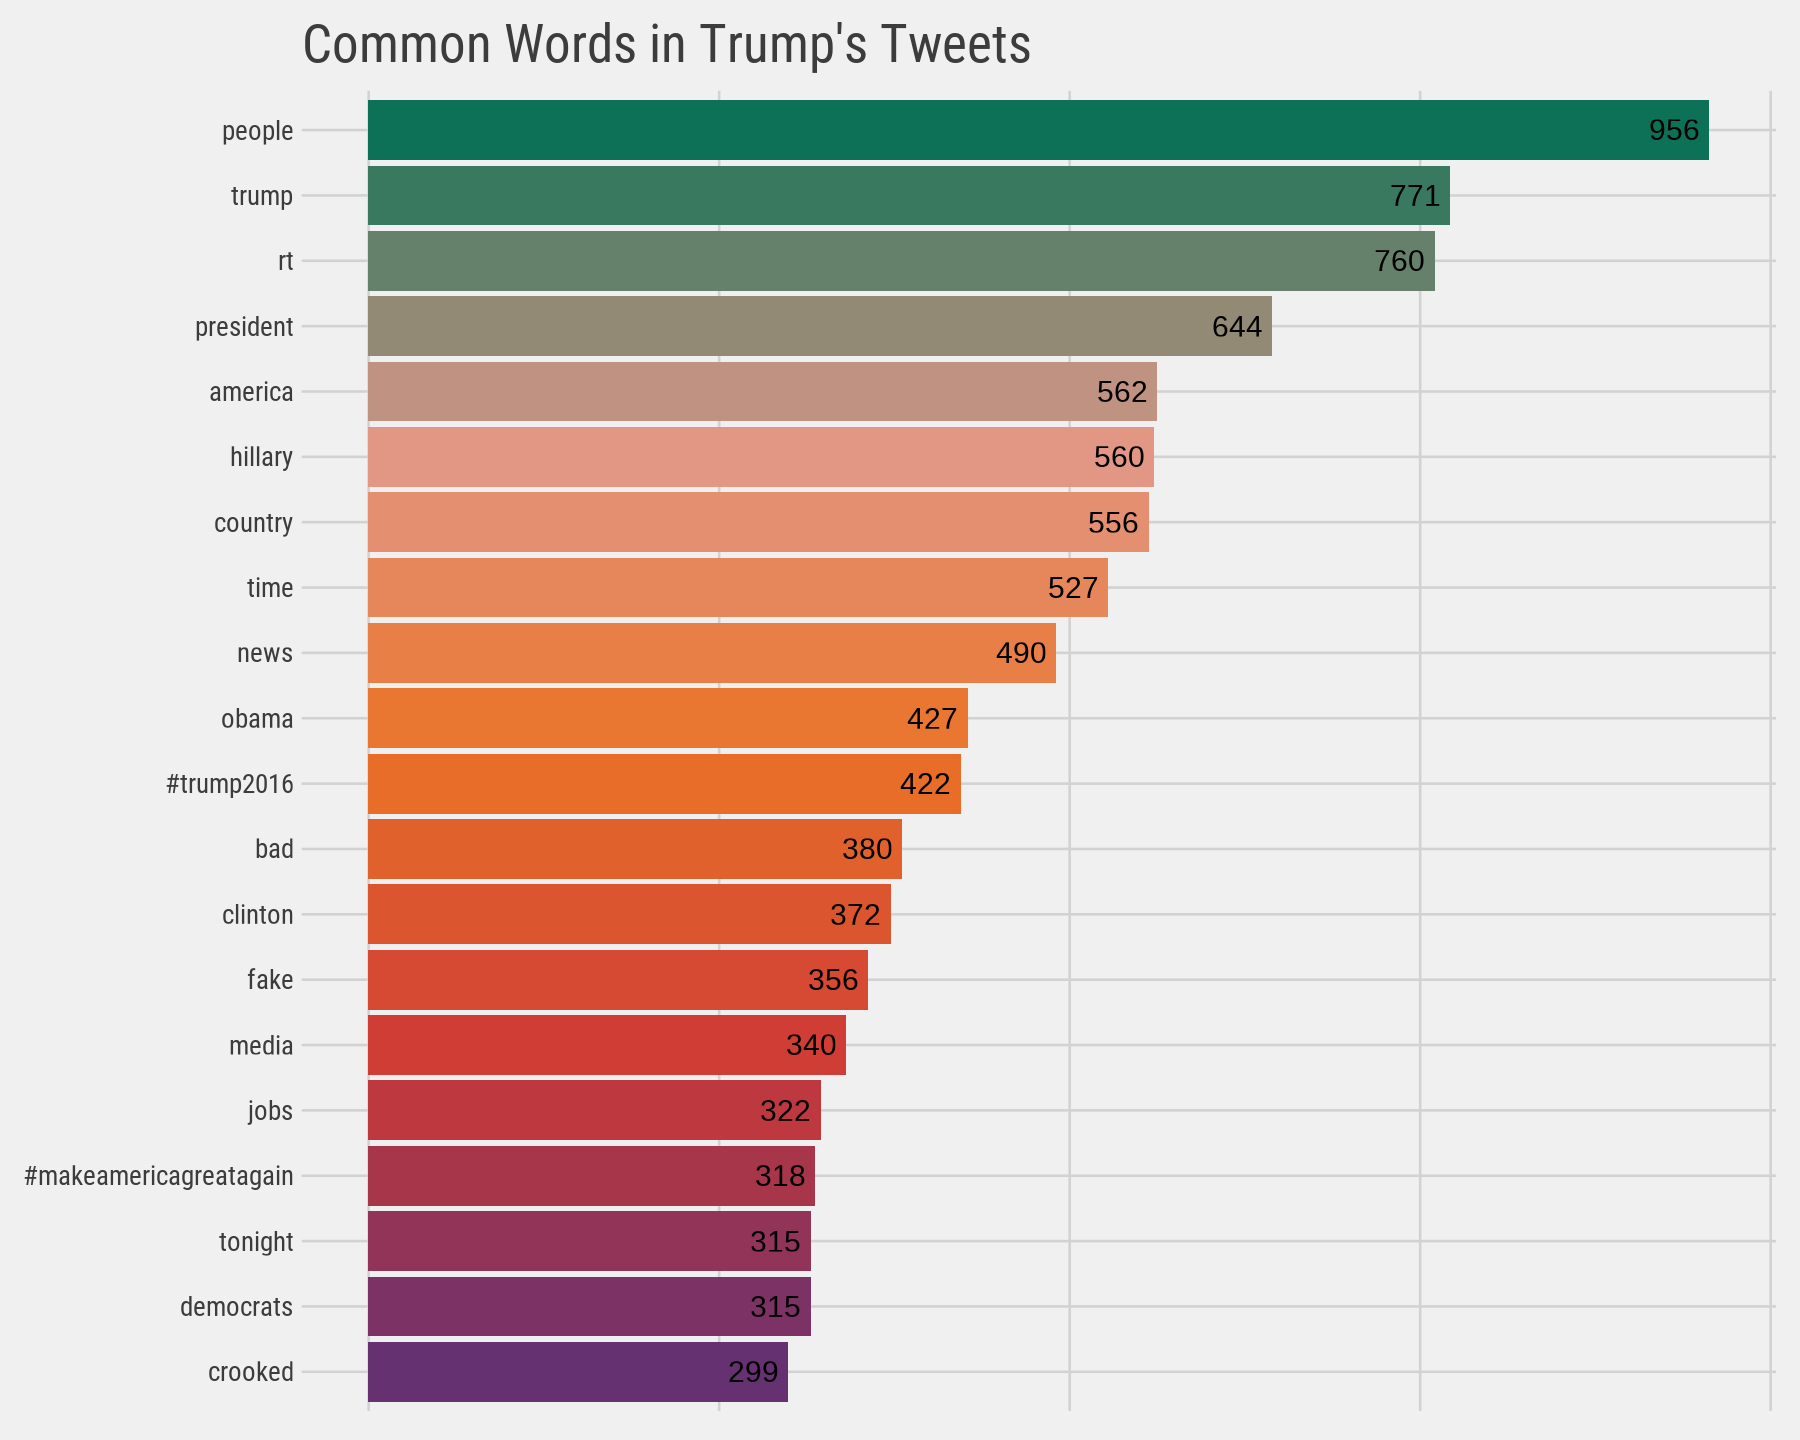

In [82]:
# Plot the most common words from @realDonaldTrump tweets
# Plot the most common words from @realDonaldTrump tweets
tweet_words %>%
count(word, sort = TRUE) %>%
head(20) %>%
mutate(word = reorder(word, n)) %>%
ggplot(aes(word, n, fill = word)) +
geom_bar(stat = "identity") +
geom_text(aes(label = n), size = 8, hjust = 1.2)+
coord_flip()+
scale_fill_manual(values = met.brewer("Java",20))+
theme_fivethirtyeight()+
theme(axis.text.x = element_blank())+
theme(axis.text.y = element_text(size = 20, face = 'bold',family = 'Roboto'))+
theme(plot.title =  element_text(size = 40, face = 'bold',family = 'Roboto'))+
theme(legend.position = "none")+
labs(title = "Common Words in Trump's Tweets")

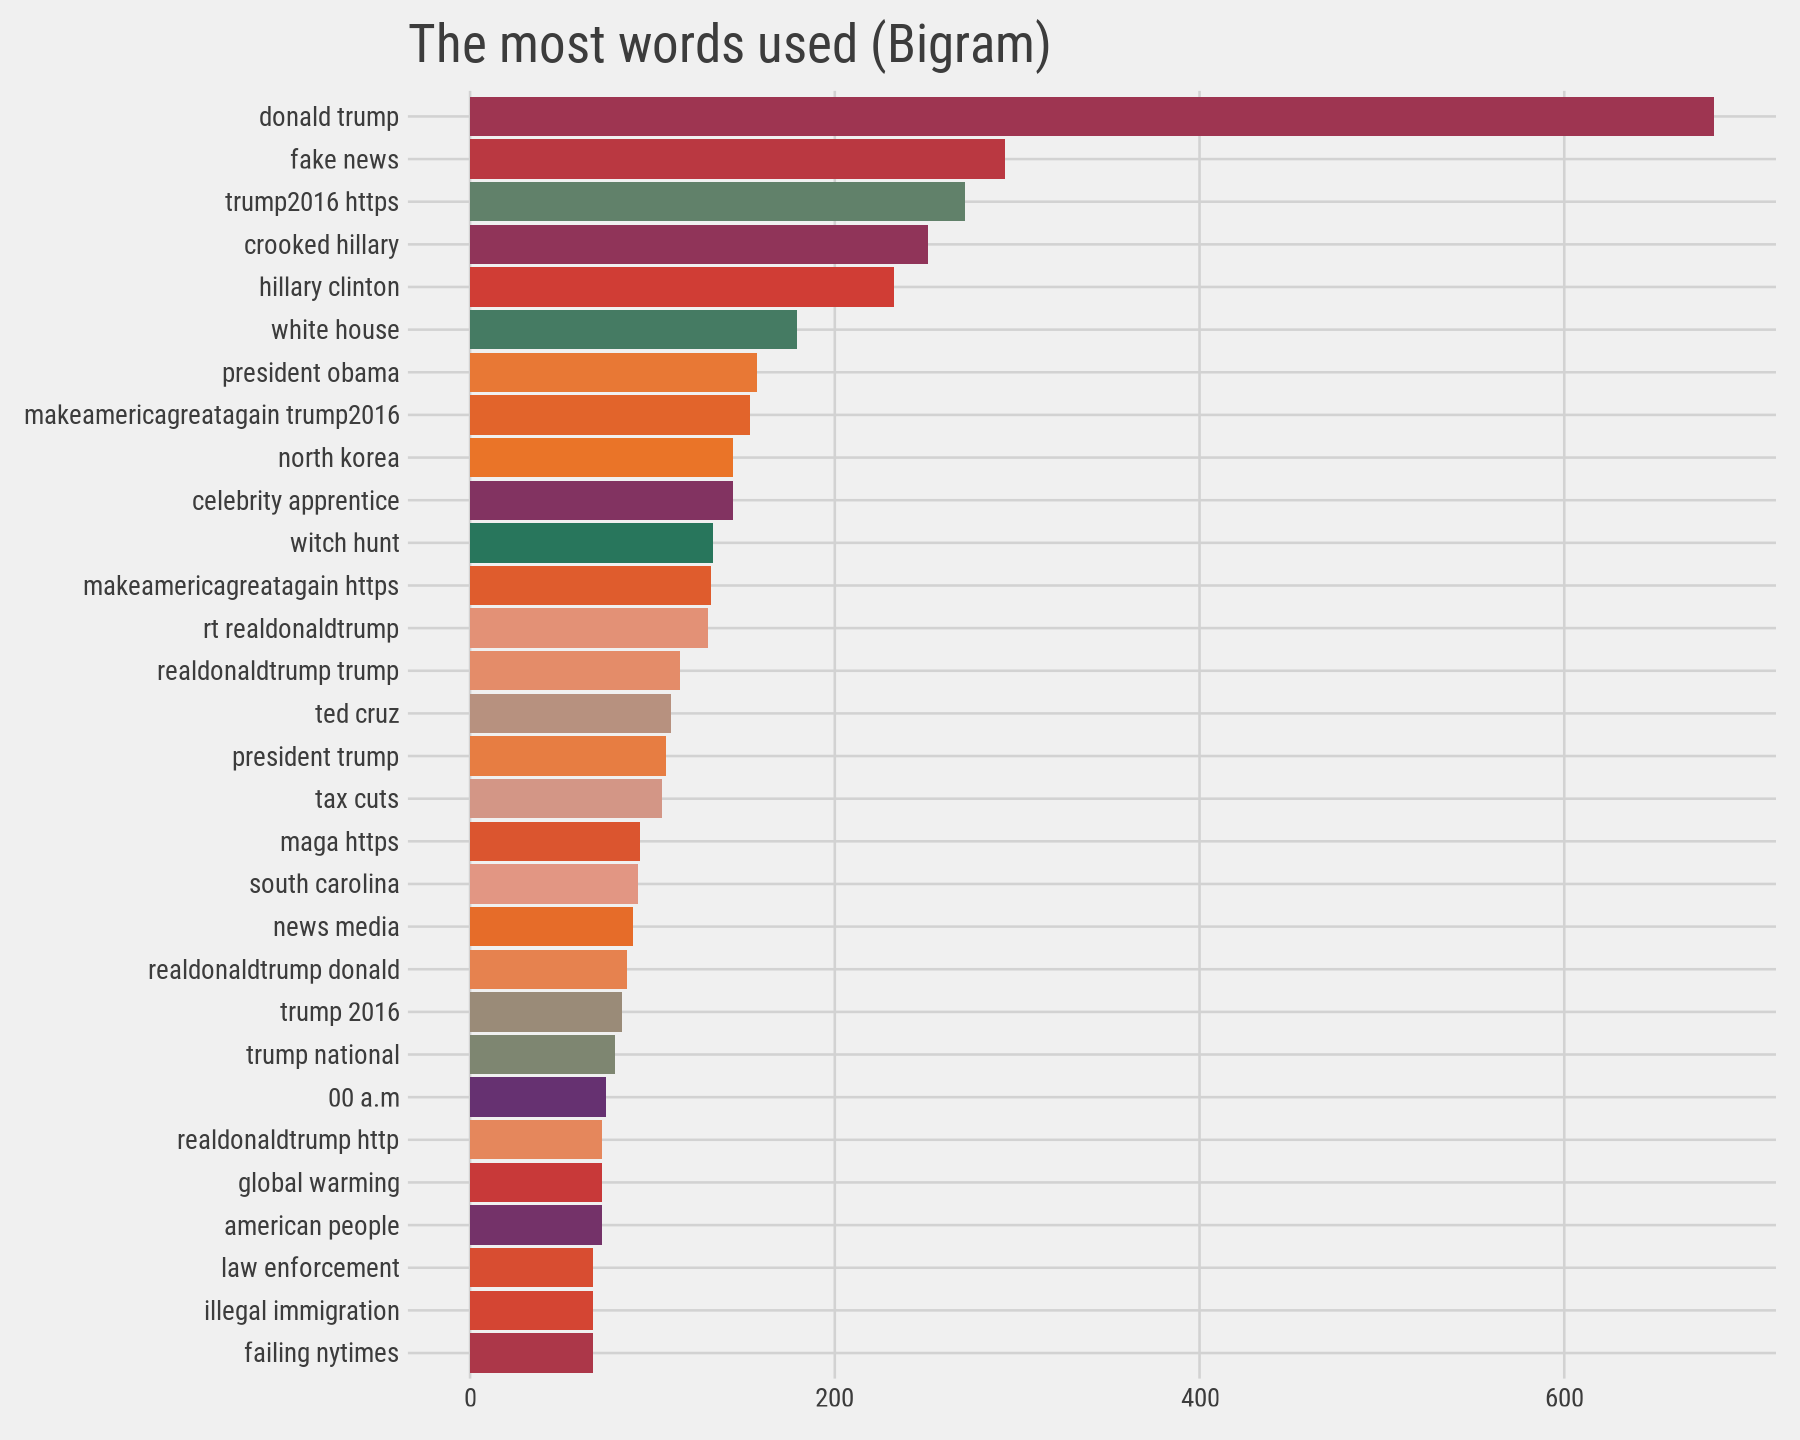

In [114]:
cleaned_tweets %>% select(text) %>%
  unnest_tokens(Bigram, text, token = "ngrams", n = 2) %>%
  separate(Bigram, c("word1", "word2"), sep = " ") %>%
  filter(!word1 %in% stop_words$word,!word2 %in% stop_words$word) %>%
  unite(Bigram, word1, word2, sep = " ") %>%
  filter(Bigram != "http t.co" & Bigram != "https t.co") %>%
  count(Bigram,sort = TRUE) %>%
  slice_max(n, n = 30) %>%
  ggplot(aes(
    x = fct_reorder(Bigram, n),
    y = n,
    fill = Bigram
  )) +
  geom_col() +
  coord_flip() +
  scale_x_reordered()+
scale_fill_manual(values = met.brewer("Java",31))+
theme_fivethirtyeight()+
theme(axis.text.x = element_text(size = 20, face = 'bold',family = 'Roboto'))+
theme(axis.text.y = element_text(size = 20, face = 'bold',family = 'Roboto'))+
theme(plot.title =  element_text(size = 40, face = 'bold',family = 'Roboto'))+
theme(legend.position = "none")+
labs(title = "The most words used (Bigram)")

## 8. Common words: Android vs. iPhone (i)
<p>Now let’s consider which words are most common from the Android relative to the iPhone, and vice versa. We’ll use the simple measure of log odds ratio <strong>for each word</strong>, calculated as:</p>
<p>$$\log_2(\frac{\frac{\mbox{# in Android} + 1}{\mbox{Total #words Android} + 1}} {\frac{\mbox{# in iPhone} + 1}{\mbox{Total #words iPhone} + 1}})$$</p>
<p><br></p>
<p>We'll only be looking at words that occur at least five times in both platforms. There will be some instances with fewer than five uses in either the Android or the iPhone, but never one with fewer than five total. If there is one occurrence of a word in the Android, you'll know that there are at least four occurrences in the iPhone for the same word.</p>
<p><br></p>
<p>The “$ + 1$”, called <a href="https://en.wikipedia.org/wiki/Additive_smoothing">Laplace smoothing</a>, are to avoid dividing by zero and to put <a href="http://varianceexplained.org/r/empirical_bayes_baseball/">more trust in common words</a>.</p>

In [83]:
# Create the log odds ratio of each word
# Create the log odds ratio of each word
android_iphone_ratios <- tweet_words %>%
  count(word, source) %>%
  group_by(word)  %>% 
  filter(sum(n) >= 5) %>%
  spread(source, n, fill = 0) %>%
  ungroup()  %>% 
  mutate_if(is.numeric, ~((. + 1) / sum(. + 1))) %>%
  mutate(logratio = log2(Android / iPhone)) %>%
  arrange(desc(logratio))

# Inspect the first six rows
head(android_iphone_ratios)

word,Android,iPhone,logratio
<chr>,<dbl>,<dbl>,<dbl>
celebrity,0.0016432889,1.658622e-05,6.630457
ebola,0.0016139445,1.658622e-05,6.604462
warming,0.0019073889,3.317245e-05,5.845470
pols,0.0006749222,1.658622e-05,5.346664
shirts,0.0006749222,1.658622e-05,5.346664
snowden,0.0006162333,1.658622e-05,5.215419


## 9. Common words: Android vs. iPhone (ii)
<p>Now that we've calculated the log odds ratio of each word, we'll plot the 15 words with the greatest log odds ratio for the Android and the iPhone.</p>
<p>With the way we've set up the log odds ratio, positive values are assigned to words from the Android, and negative values are assigned to the iPhone. </p>

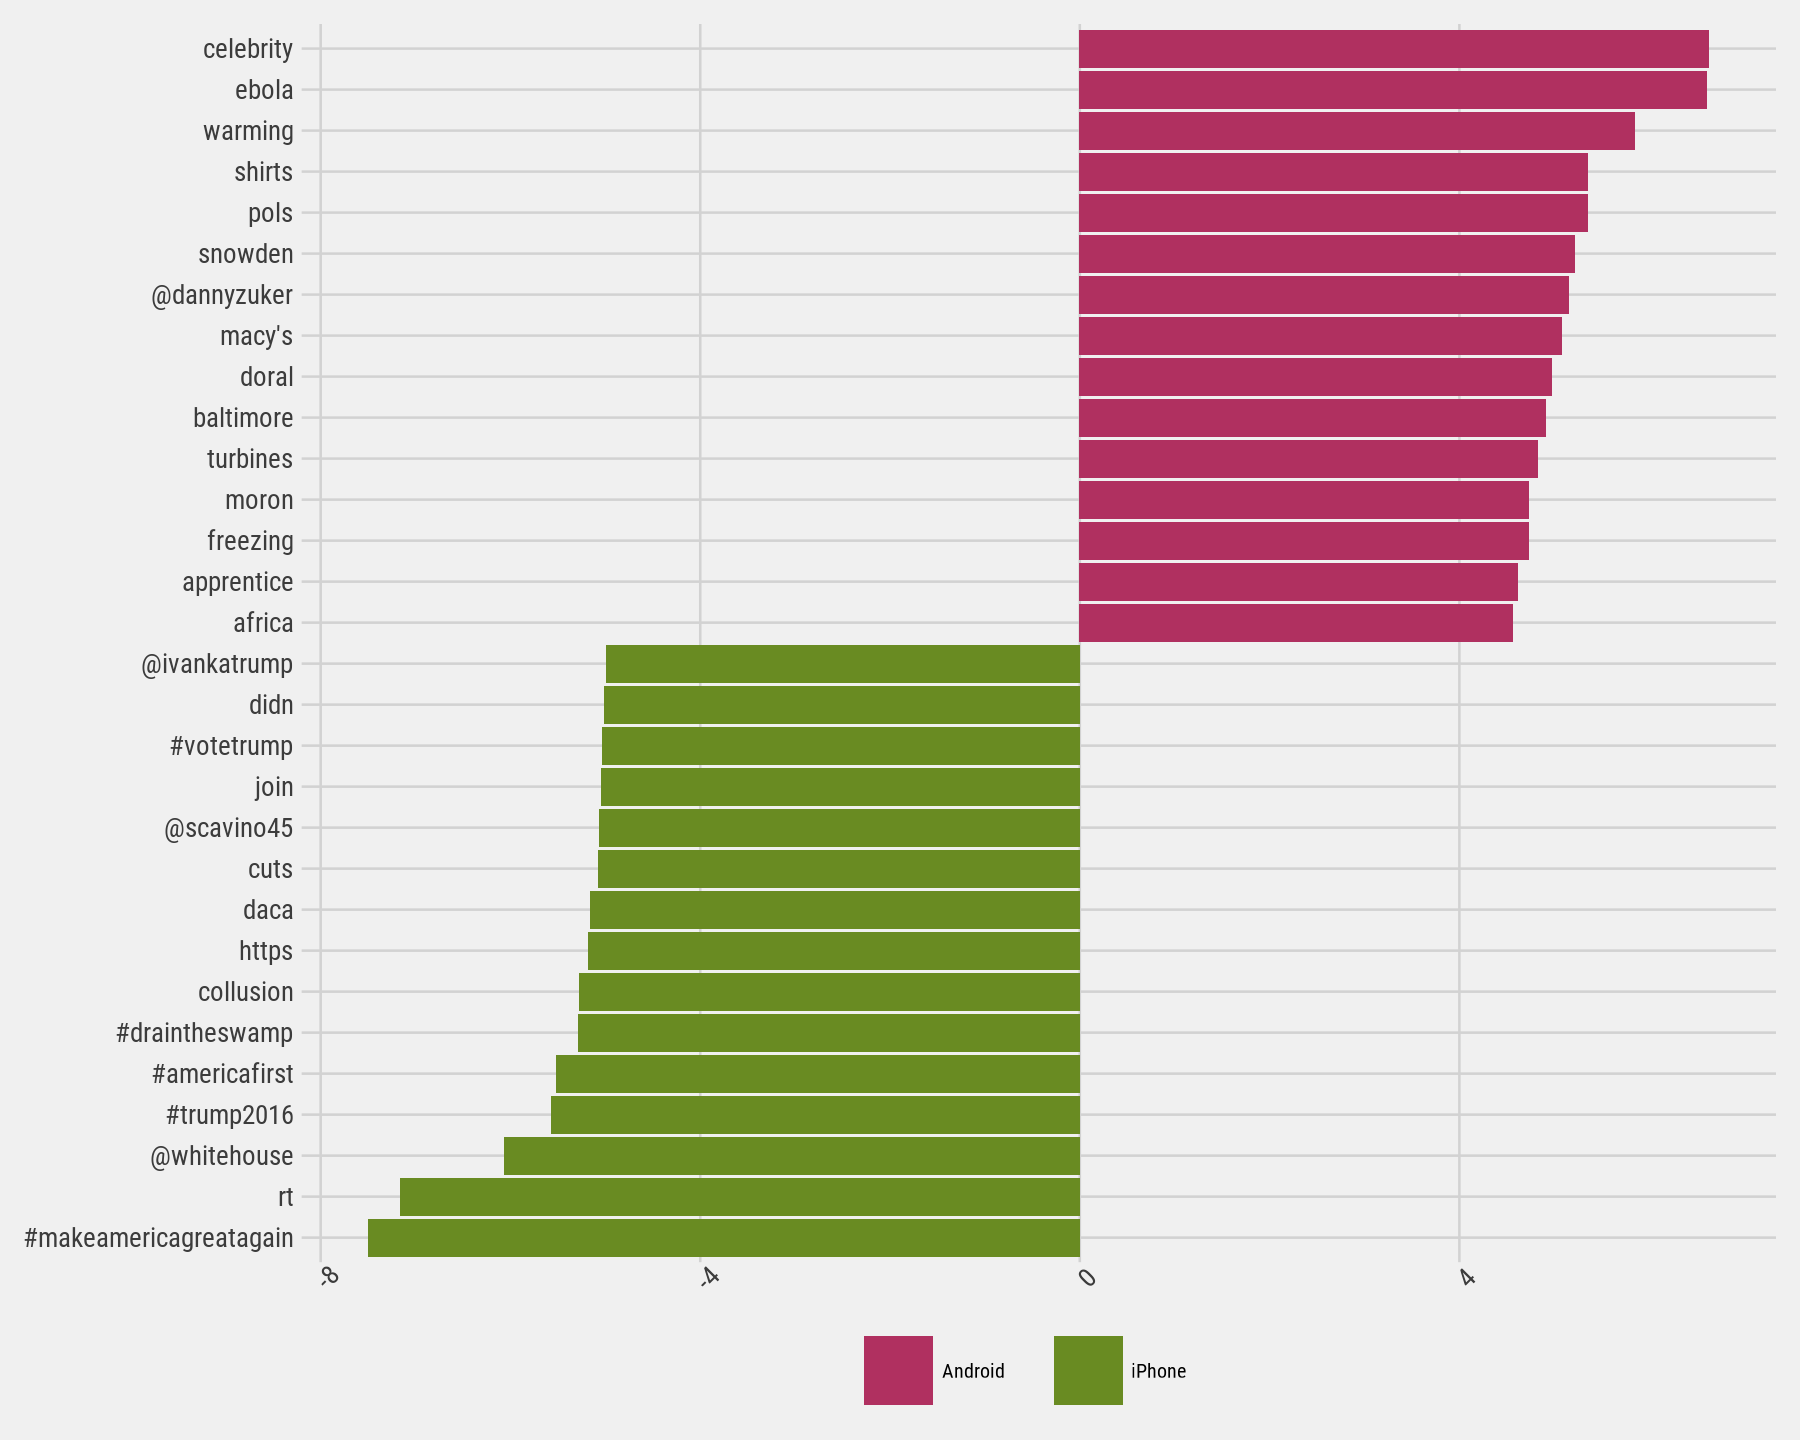

In [84]:
# Plot the log odds ratio for each word by device
android_iphone_ratios %>%
  group_by(logratio > 0) %>%
  top_n(15, abs(logratio)) %>%
  ungroup() %>%
  mutate(word = reorder(word, logratio)) %>%
  ggplot(aes(word, logratio, fill = logratio < 0)) +
  geom_bar(stat = "identity") +
  coord_flip()  +
  scale_fill_manual(name = "", labels = c("Android", "iPhone"),
                    values = c("#B03060", "#698B22"))+
theme_fivethirtyeight()+
theme(axis.text.x = element_text(size = 20, face = 'bold', angle = 45,family = 'Roboto'))+
theme(axis.text.y = element_text(size = 20, face = 'bold',family = 'Roboto'))+
theme(plot.title =  element_text(size = 40, face = 'bold',family = 'Roboto'))+
theme(plot.subtitle = element_text(size = 30, face = 'bold',family = 'Roboto'))+
theme(legend.text = element_text(size = 15, face = "bold", color="black",family = 'Roboto'))+
theme(legend.title = element_text(family = "Roboto",color = "black",size = 10, face = "bold"))+
theme(legend.key.size = unit(1.5, 'cm'))

## 10. Adding sentiments
<p>What do we know so far? </p>
<ul>
<li><p><strong>Most hashtags come from the iPhone.</strong> Indeed, almost no tweets from Trump's Android contained hashtags, with some rare exceptions like <a href="https://twitter.com/realDonaldTrump/status/753960134422900736">this one</a>. (This is true only because we filtered out the quoted "retweets," as Trump does sometimes quote tweets <a href="https://twitter.com/realDonaldTrump/status/731805331425218560">like this</a> that contain hashtags).</p></li>
<li><p><strong>Words like "join" and times like "7 pm", came only from the iPhone.</strong> The iPhone is responsible for event announcements like <a href="https://twitter.com/realDonaldTrump/status/743522630230228993">this one</a> ("Join me in Houston, Texas tomorrow night at 7 pm!")</p></li>
<li><p><strong>Emotionally charged words, like "poorly," "angry," and "stupid" were more common on Android.</strong> This supports the original hypothesis that this is the "angrier" or more hyperbolic account.</p></li>
</ul>
<p>Since we’ve observed a difference in word use between the Android and iPhone tweets, let's see if there's a difference in sentiment. We’ll work with the NRC Word-Emotion Association lexicon, available from the tidytext package, which associates words with ten sentiments: positive, negative, anger, anticipation, disgust, fear, joy, sadness, surprise, and trust.</p>

In [85]:
# Create a sentiment data frame from the NRC lexicon
nrc <- read_csv("../input/nrc-data/NRC.csv")
bing <- read_csv("../input/bing-data/Bing.csv")

# Join the NRC lexicon to log odds ratio data frame
android_iphone_sentiment <- android_iphone_ratios %>%
  inner_join(nrc, by = "word") %>%
  filter(!sentiment %in% c("positive", "negative")) %>%
  mutate(sentiment = reorder(sentiment, -logratio),
         word = reorder(word, -logratio)) %>%
  group_by(sentiment) %>%
  top_n(10, abs(logratio)) %>%
  ungroup()

# Inspect the first six rows
head(android_iphone_sentiment)

Rows: 13901 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): word, sentiment

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 6786 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): word, sentiment

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


word,Android,iPhone,logratio,sentiment
<fct>,<dbl>,<dbl>,<dbl>,<fct>
celebrity,0.001643289,1.658622e-05,6.630457,anger
celebrity,0.001643289,1.658622e-05,6.630457,anticipation
celebrity,0.001643289,1.658622e-05,6.630457,disgust
celebrity,0.001643289,1.658622e-05,6.630457,joy
celebrity,0.001643289,1.658622e-05,6.630457,surprise
celebrity,0.001643289,1.658622e-05,6.630457,trust


In [ ]:
head(tweet_words)

Joining, by = "word"


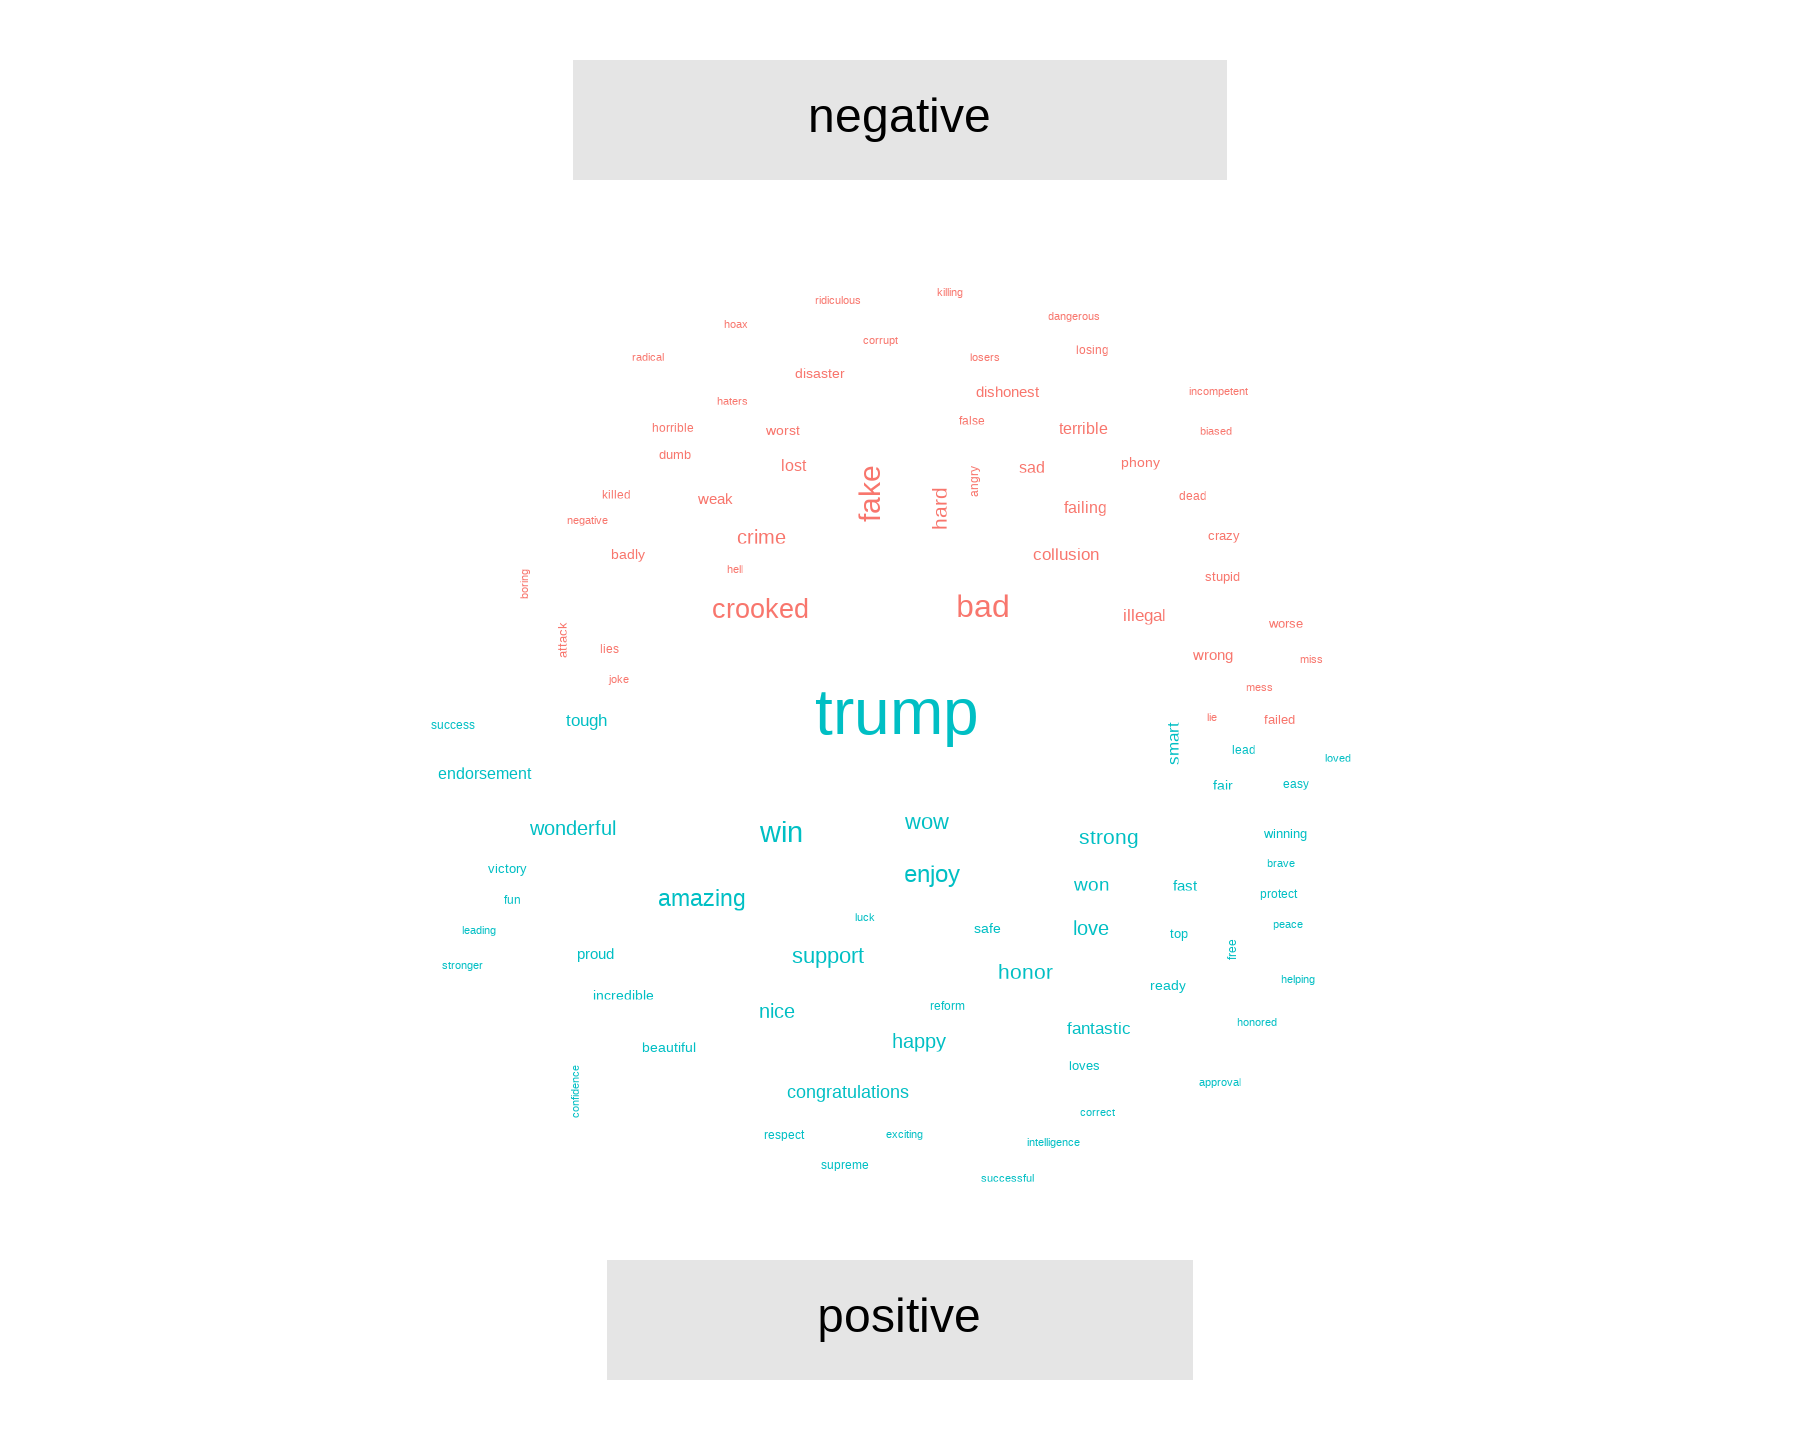

In [102]:
tweet_words %>%
  inner_join(get_sentiments("bing")) %>%
  count(word, sentiment, sort=TRUE) %>%
  acast(word ~ sentiment, value.var="n", fill=0) %>%
  comparison.cloud(colors=c("#F8766D", "#00BFC4"),scale = c(4,0.5),max.words=100)

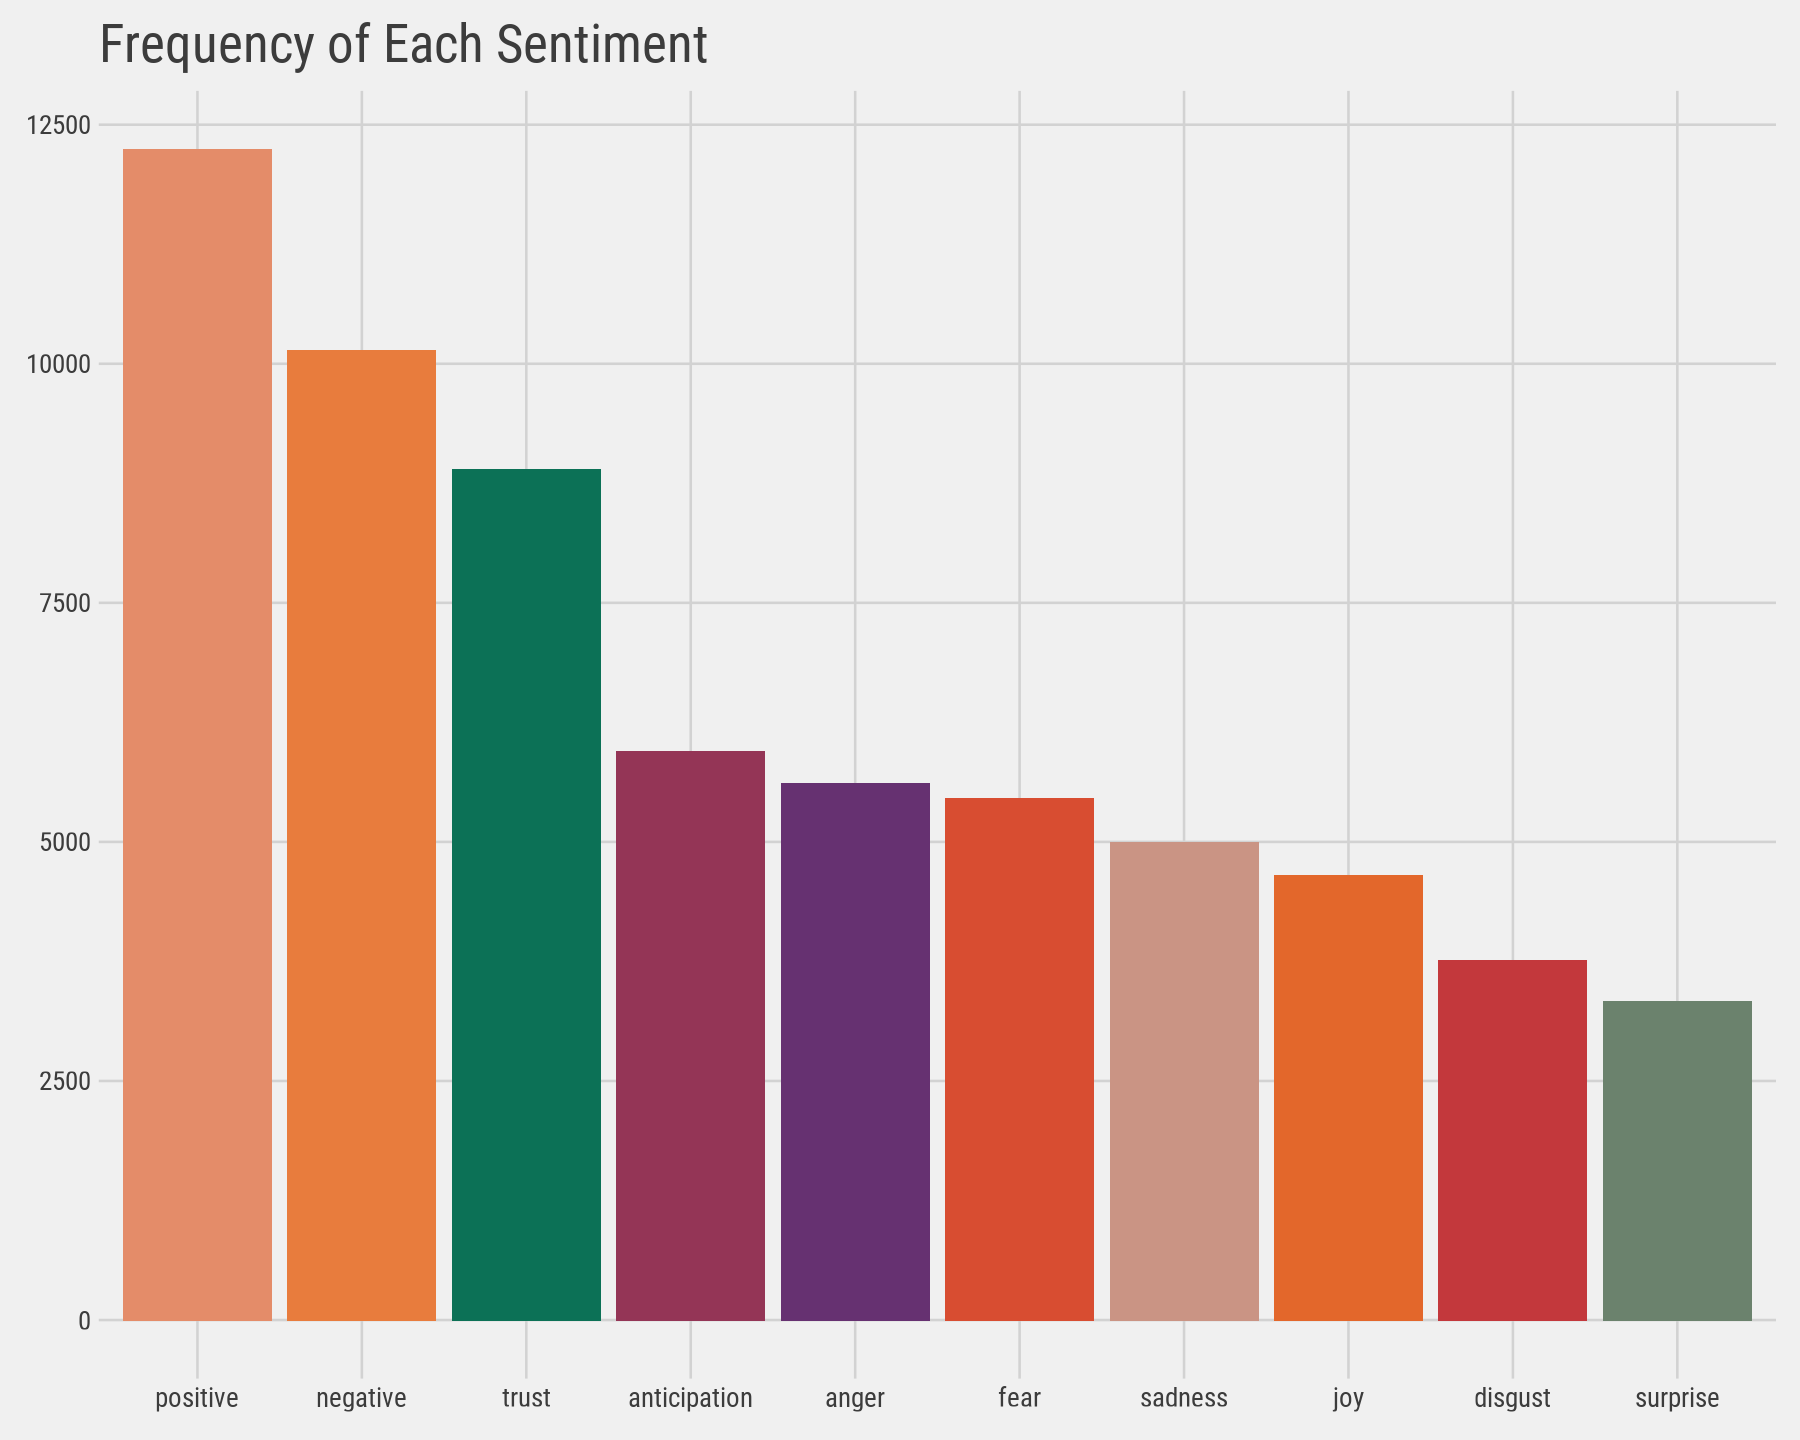

In [91]:
sentiments <- tweet_words %>% 
  inner_join(nrc, "word") %>%
  count(word, sentiment, sort=TRUE) 

# Frequency of each sentiment
ggplot(data=sentiments, aes(x=reorder(sentiment, -n, sum), y=n)) + 
geom_bar(stat="identity", aes(fill=sentiment), show.legend=FALSE) +
scale_fill_manual(values = met.brewer("Java",10))+
theme_fivethirtyeight()+
theme(axis.text.x = element_text(size = 20, face = 'bold',family = 'Roboto'))+
theme(axis.text.y = element_text(size = 20, face = 'bold',family = 'Roboto'))+
theme(plot.title =  element_text(size = 40, face = 'bold',family = 'Roboto'))+
theme(legend.position = "none")+
labs(title = "Frequency of Each Sentiment")

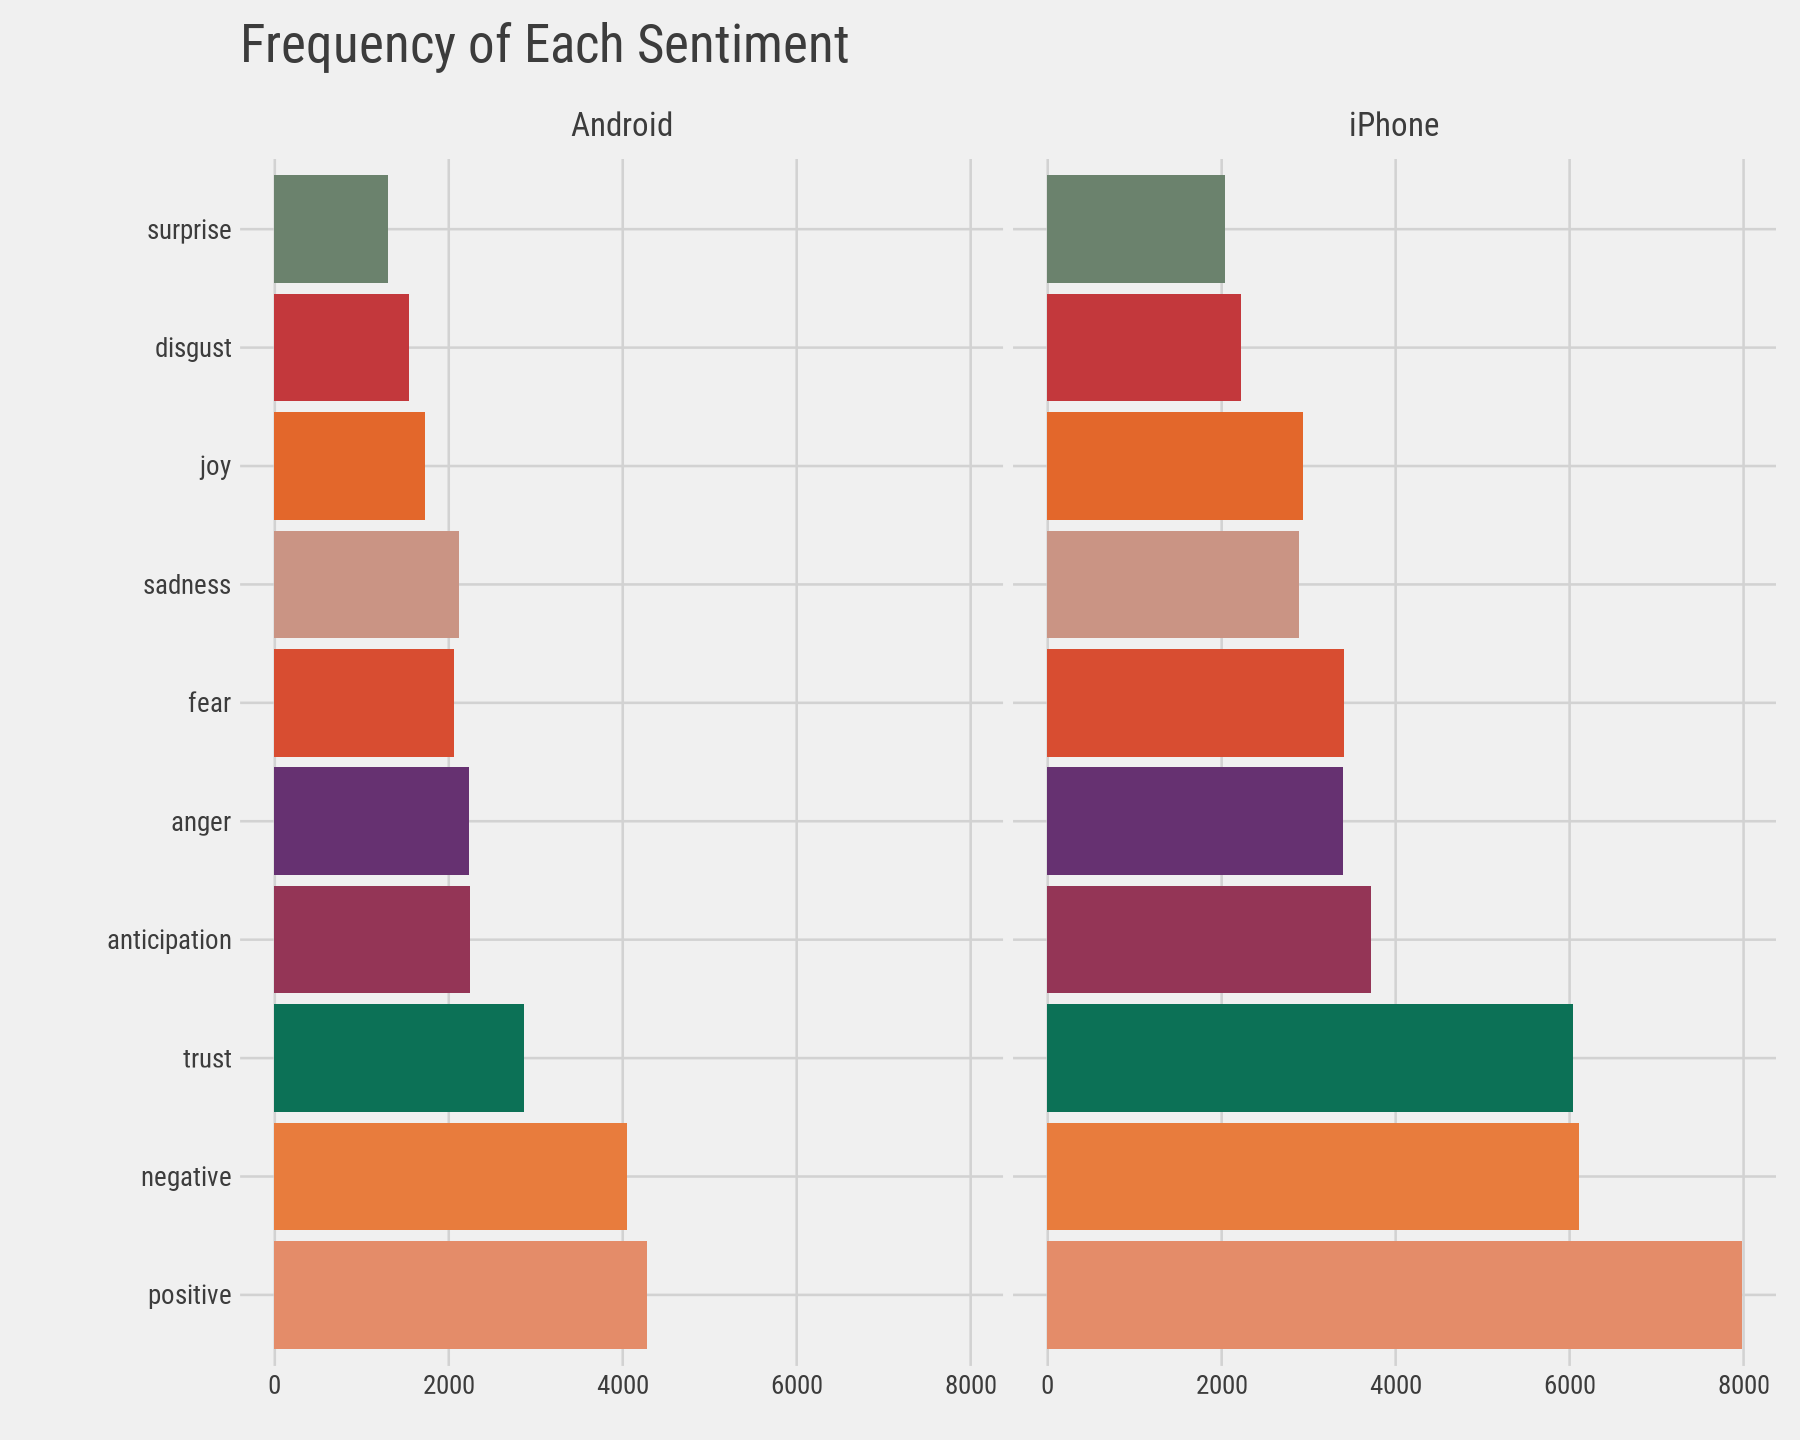

In [92]:
sentiments <- tweet_words %>% 
  inner_join(nrc, "word") %>%
  group_by(source)%>%
  count(word, sentiment, sort=TRUE) 

# Frequency of each sentiment
ggplot(data=sentiments, aes(x=reorder(sentiment, -n, sum), y=n)) + 
geom_bar(stat="identity", aes(fill=sentiment), show.legend=FALSE) +
facet_wrap(~source)+
scale_fill_manual(values = met.brewer("Java",10))+
coord_flip()+
theme_fivethirtyeight()+
theme(axis.text.x = element_text(size = 20, face = 'bold',family = 'Roboto'))+
theme(axis.text.y = element_text(size = 20, face = 'bold',family = 'Roboto'))+
theme(plot.title =  element_text(size = 40, face = 'bold',family = 'Roboto'))+
theme(strip.text       = element_text(size=25, hjust = 0.5, vjust = 0.5,face = "bold", family = 'Roboto'))+
theme(legend.position = "none")+
labs(title = "Frequency of Each Sentiment ")

In [ ]:
head(sentiments)

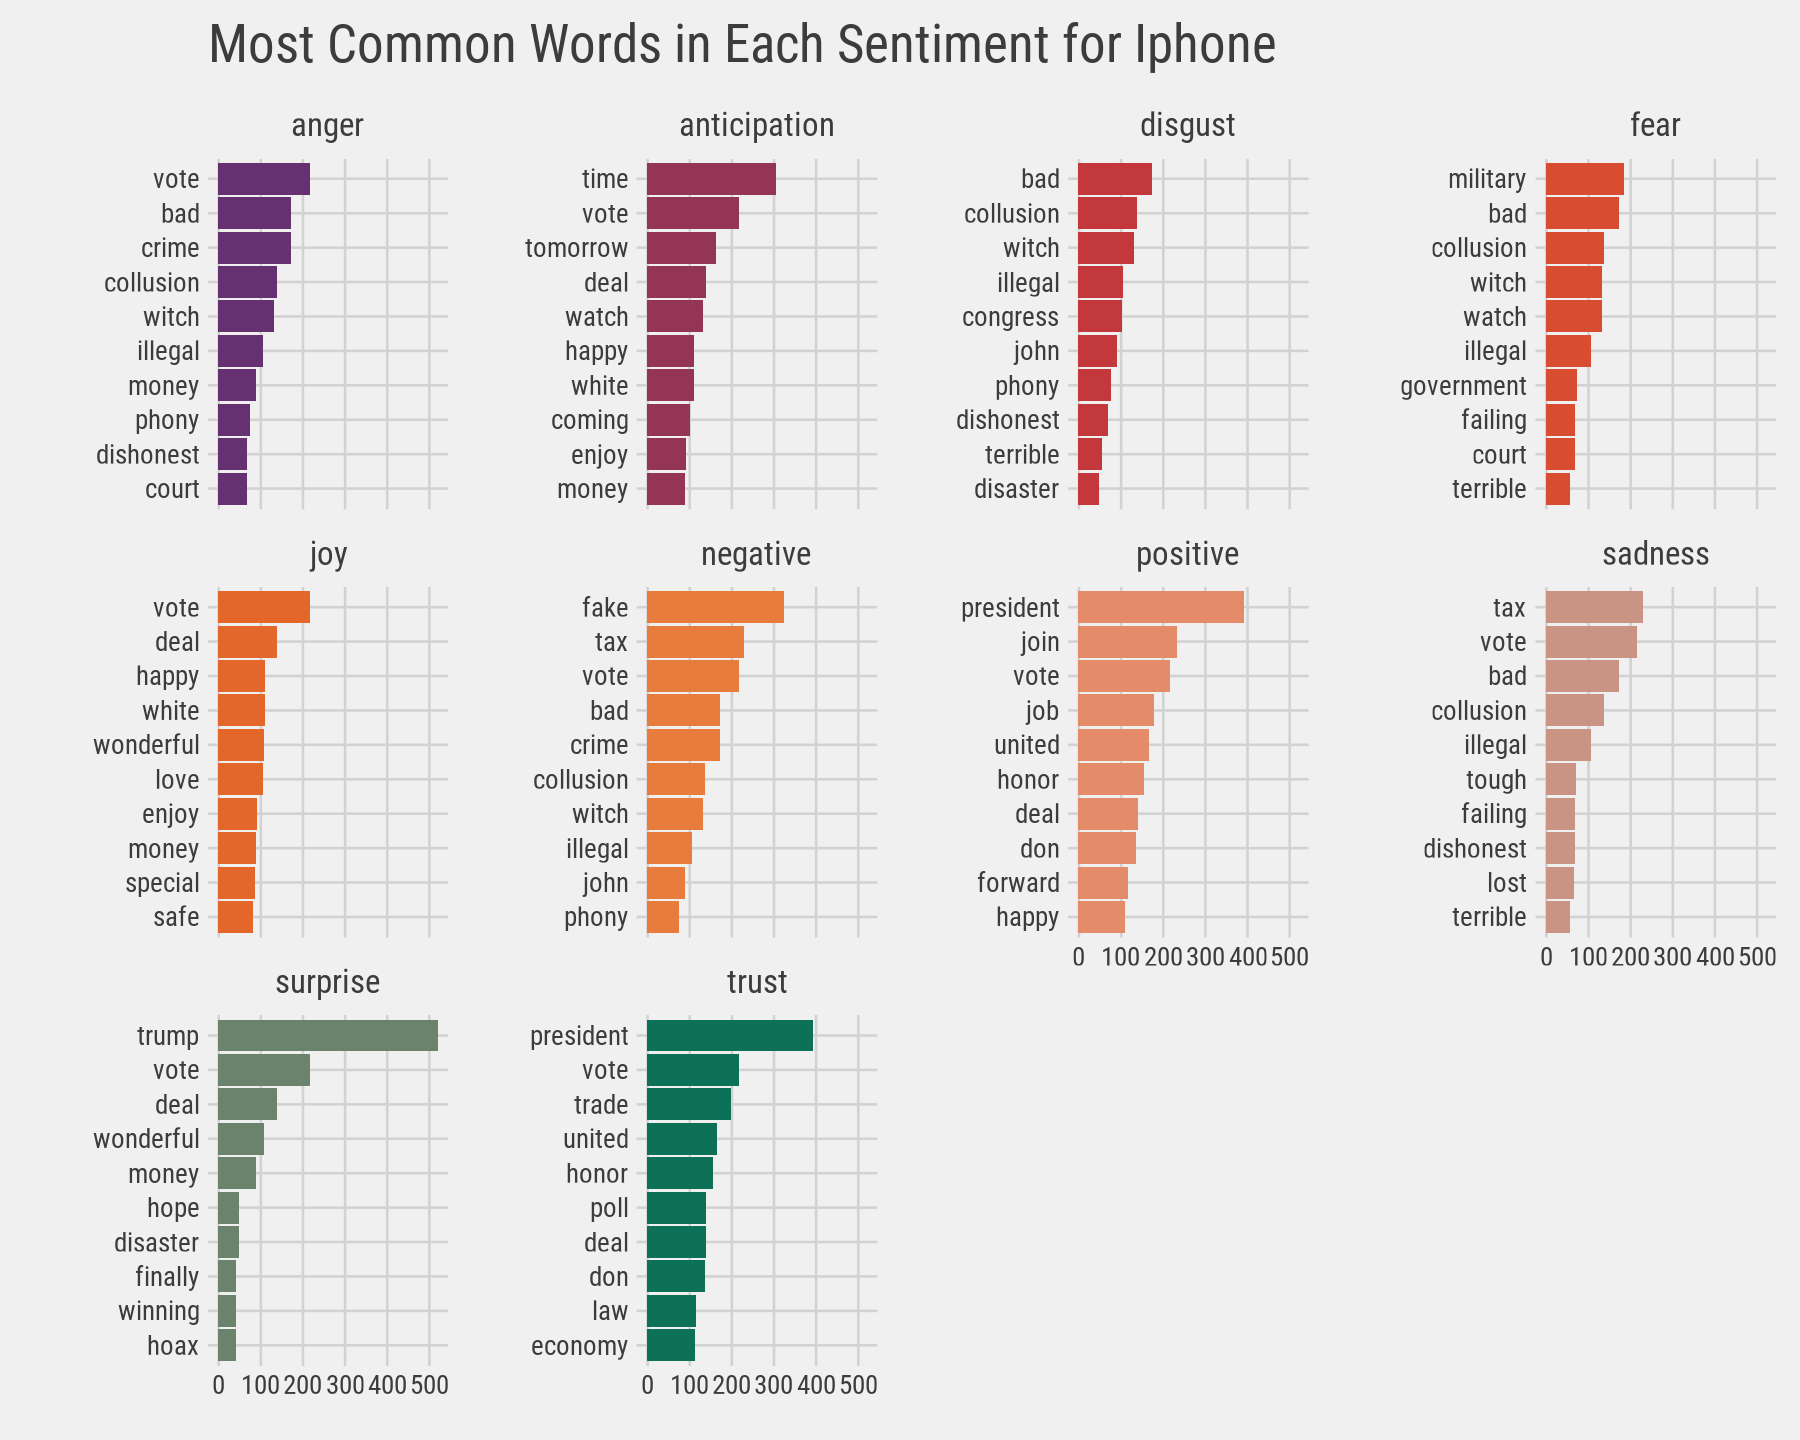

In [93]:
sentiments %>%
filter(source == "iPhone")%>%
group_by(sentiment) %>%
arrange(desc(n)) %>%
slice(1:10) %>%
ggplot(aes(x=reorder(word, n), y=n)) +
geom_col(aes(fill=sentiment), show.legend=FALSE) +
facet_wrap(~sentiment, scales="free_y") +
coord_flip() +
scale_fill_manual(values = met.brewer("Java",10))+
theme_fivethirtyeight()+
theme(axis.text.x = element_text(size = 20, face = 'bold',family = 'Roboto'))+
theme(axis.text.y = element_text(size = 20, face = 'bold',family = 'Roboto'))+
theme(plot.title =  element_text(size = 40, face = 'bold',family = 'Roboto'))+
theme(strip.text       = element_text(size=25, hjust = 0.5, vjust = 0.5,face = "bold", family = 'Roboto'))+
theme(legend.position = "none")+
labs(title = "Most Common Words in Each Sentiment for Iphone")

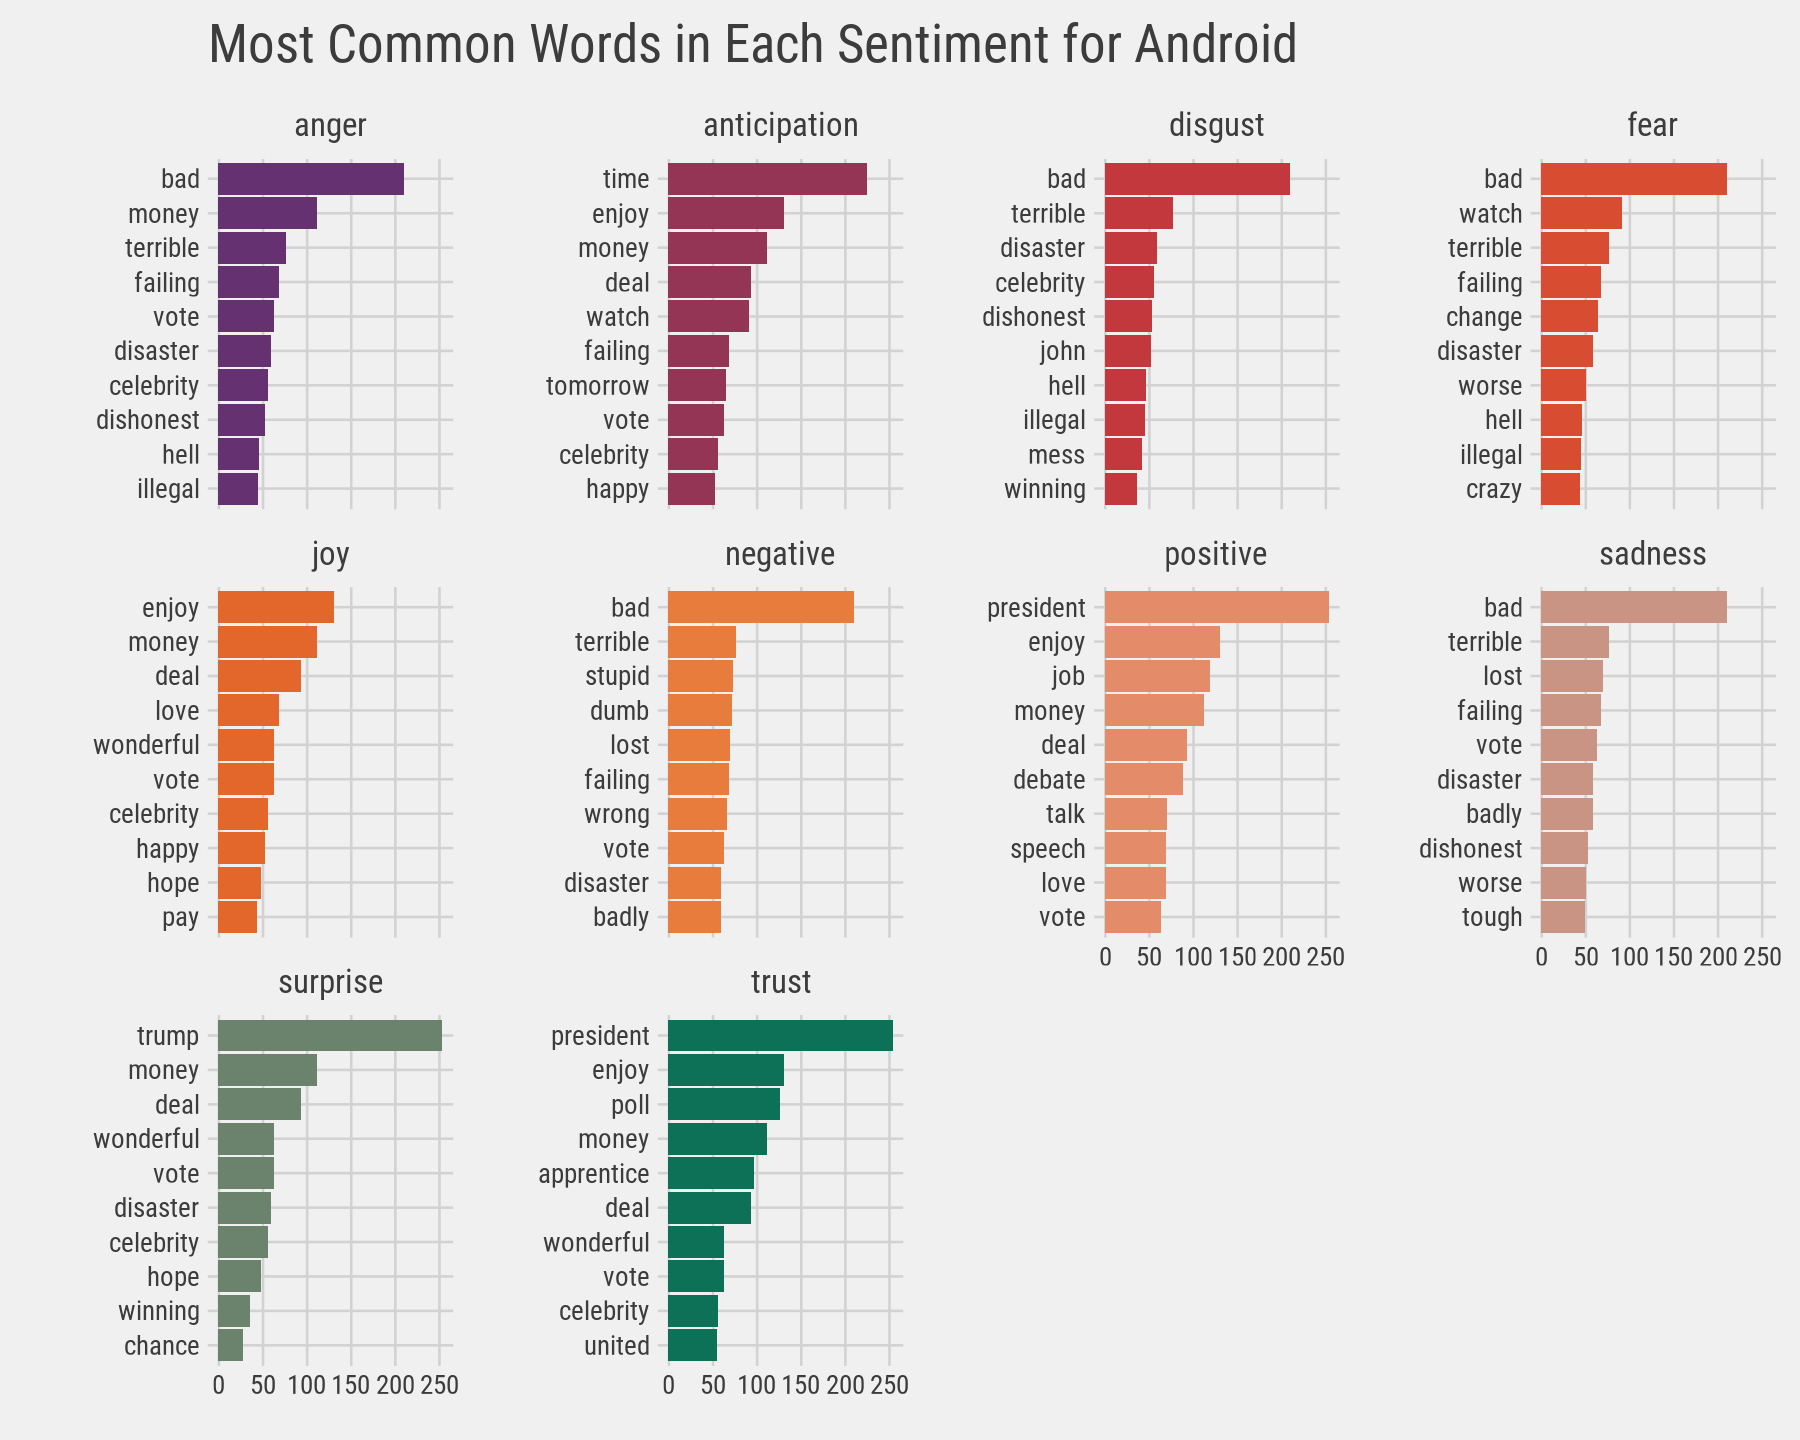

In [94]:
sentiments %>%
filter(source == "Android")%>%
group_by(sentiment) %>%
arrange(desc(n)) %>%
slice(1:10) %>%
ggplot(aes(x=reorder(word, n), y=n)) +
geom_col(aes(fill=sentiment), show.legend=FALSE) +
facet_wrap(~sentiment, scales="free_y") +
coord_flip() +
scale_fill_manual(values = met.brewer("Java",10))+
theme_fivethirtyeight()+
theme(axis.text.x = element_text(size = 20, face = 'bold',family = 'Roboto'))+
theme(axis.text.y = element_text(size = 20, face = 'bold',family = 'Roboto'))+
theme(plot.title =  element_text(size = 40, face = 'bold',family = 'Roboto'))+
theme(strip.text       = element_text(size=25, hjust = 0.5, vjust = 0.5,face = "bold", family = 'Roboto'))+
theme(legend.position = "none")+
labs(title = "Most Common Words in Each Sentiment for Android")

## 11. Conclusion: The ghost in the political machine
<p>There's a difference in style and sentiment between Trump's tweets from the Android and the iPhone. We know Trump used the Android until March 2017, but who was tweeting from the iPhone on Trump's behalf? I was fascinated by a <a href="http://www.newyorker.com/magazine/2016/07/25/donald-trumps-ghostwriter-tells-all">New Yorker article</a> about Tony Schwartz, Trump’s ghostwriter for <em>The Art of the Deal</em>. Of particular interest was how Schwartz imitated Trump’s voice and philosophy:</p>
<blockquote>
  <p><em>In his journal, Schwartz describes the process of trying to make Trump’s voice palatable in the book. It was kind of “a trick,” he writes, to mimic Trump’s blunt, staccato, no-apologies delivery while making him seem almost boyishly appealing…. Looking back at the text now, Schwartz says, “I created a character far more winning than Trump is.”</em></p>
</blockquote>
<p>A lot has been written about Trump’s mental state. But I’d rather get inside the head of the anonymous staffer whose job is to imitate Trump’s unique cadence (“Very sad!”) or put a positive spin on it, to millions of his followers. Are they a true believer, or just a cog in a political machine, mixing whatever mainstream appeal they can into the <a href="https://twitter.com/realDonaldTrump">@realDonaldTrump</a> concoction? Like Tony Schwartz, will they one day regret their involvement?</p>